In [1]:
from matplotlib import rc, font_manager as fm

# 나눔고딕 폰트 경로 설정
font_location = 'data/나눔고딕/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()

# 폰트 설정
rc('font', family=font_name)

# 피처 엔지니어링 !

In [2]:
!pip install lightgbm==3.3.2
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [3]:
import lightgbm
lightgbm.__version__

'3.3.2'

In [4]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [5]:
"""

temp_df = pd.read_csv('data/인코딩_완료_230914.csv')

# "상권_분류_코드_명"이 "골목상권"인 행만 추출
split_df1 = temp_df[temp_df['상권_구분_코드_명'] == '골목상권']

# 추출한 데이터프레임을 저장 (예시: CSV 파일로 저장)
split_df1.to_csv('골목상권_데이터230914.csv', index=False, encoding = 'utf-8 sig')

"""

In [6]:
"""

# "상권_분류_코드_명"이 "골목상권"인 행만 추출
split_df2 = temp_df[temp_df['상권_구분_코드_명'] != '골목상권']
split_df2 = split_df2.drop(["배후지_아파트_단지_수", 
                    "배후지_아파트_가격_1_억_미만_세대_수", 
                    "배후지_아파트_가격_1_억_세대_수", 
                    "배후지_아파트_가격_2_억_세대_수", 
                    "배후지_아파트_가격_3_억_세대_수", 
                    "배후지_아파트_가격_4_억_세대_수", 
                    "배후지_아파트_가격_5_억_세대_수", 
                    "배후지_아파트_가격_6_억_이상_세대_수"], axis=1)
# 추출한 데이터프레임을 저장 (예시: CSV 파일로 저장)
split_df2.to_csv('!=골목상권_데이터230914.csv', index=False, encoding = 'utf-8 sig')

"""

## 코드(=잠정 확정) 사용

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 151819	training's l2: 2.30489e+10	valid_1's rmse: 139936	valid_1's l2: 1.95821e+10
[2]	training's rmse: 147280	training's l2: 2.16915e+10	valid_1's rmse: 135819	valid_1's l2: 1.84469e+10
[3]	training's rmse: 142948	training's l2: 2.04342e+10	valid_1's rmse: 131917	valid_1's l2: 1.74022e+10
[4]	training's rmse: 138900	training's l2: 1.92932e+10	valid_1's rmse: 128328	valid_1's l2: 1.64681e+10
[5]	training's rmse: 135019	training's l2: 1.82301e+10	valid_1's rmse: 124946	valid_1's l2: 1.56116e+10
[6]	training's rmse: 131330	training's l2: 1.72475e+10	valid_1's rmse: 121736	valid_1's l2: 1.48196e+10
[7]	training's rmse: 127838	training's l2: 1.63427e+10	valid_1's rmse: 118573	valid_1's l2: 1.40595e+10
[8]	training's rmse: 124481	training's l2: 1.54956e+10	valid_1's rmse: 115710

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=43, early_stopping_rounds=43 will be ignored. Current value: early_stopping_round=43
[1]	training's rmse: 141890	training's l2: 2.01328e+10	valid_1's rmse: 174312	valid_1's l2: 3.03845e+10
[2]	training's rmse: 136816	training's l2: 1.87185e+10	valid_1's rmse: 168824	valid_1's l2: 2.85015e+10
[3]	training's rmse: 131997	training's l2: 1.74233e+10	valid_1's rmse: 163540	valid_1's l2: 2.67453e+10
[4]	training's rmse: 127484	training's l2: 1.62521e+10	valid_1's rmse: 158537	valid_1's l2: 2.51341e+10
[5]	training's rmse: 123202	training's l2: 1.51787e+10	valid_1's rmse: 153840	valid_1's l2: 2.36667e+10
[6]	training's rmse: 118965	training's l2: 1.41526e+10	valid_1's rmse: 149482	valid_1's l2: 2.23449e+10
[7]	training's rmse: 114994	training's l2: 1.32237e+10	valid_1's rmse: 145379	valid_1's l2: 2.11351e+10
[8]	training's rmse: 111195	training's l2: 1.23644e+10	valid_1's rmse: 141533

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 146703	training's l2: 2.15218e+10	valid_1's rmse: 161107	valid_1's l2: 2.59556e+10
[2]	training's rmse: 142491	training's l2: 2.03036e+10	valid_1's rmse: 156978	valid_1's l2: 2.4642e+10
[3]	training's rmse: 138493	training's l2: 1.91802e+10	valid_1's rmse: 153092	valid_1's l2: 2.34371e+10
[4]	training's rmse: 134553	training's l2: 1.81044e+10	valid_1's rmse: 149592	valid_1's l2: 2.23778e+10
[5]	training's rmse: 130862	training's l2: 1.71248e+10	valid_1's rmse: 146071	valid_1's l2: 2.13366e+10
[6]	training's rmse: 127470	training's l2: 1.62487e+10	valid_1's rmse: 142761	valid_1's l2: 2.03808e+10
[7]	training's rmse: 123977	training's l2: 1.53704e+10	valid_1's rmse: 139896	valid_1's l2: 1.95708e+10
[8]	training's rmse: 120626	training's l2: 1.45506e+10	valid_1's rmse: 136943	

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=43, early_stopping_rounds=43 will be ignored. Current value: early_stopping_round=43
[1]	training's rmse: 152631	training's l2: 2.32963e+10	valid_1's rmse: 130289	valid_1's l2: 1.69752e+10
[2]	training's rmse: 146795	training's l2: 2.15488e+10	valid_1's rmse: 125254	valid_1's l2: 1.56885e+10
[3]	training's rmse: 141243	training's l2: 1.99495e+10	valid_1's rmse: 120511	valid_1's l2: 1.45228e+10
[4]	training's rmse: 136029	training's l2: 1.85038e+10	valid_1's rmse: 116024	valid_1's l2: 1.34616e+10
[5]	training's rmse: 131241	training's l2: 1.72242e+10	valid_1's rmse: 111990	valid_1's l2: 1.25417e+10
[6]	training's rmse: 126667	training's l2: 1.60445e+10	valid_1's rmse: 107970	valid_1's l2: 1.16576e+10
[7]	training's rmse: 122448	training's l2: 1.49936e+10	valid_1's rmse: 104427	valid_1's l2: 1.0905e+10
[8]	training's rmse: 118390	training's l2: 1.40162e+10	valid_1's rmse: 100937	

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 152289	training's l2: 2.31921e+10	valid_1's rmse: 137893	valid_1's l2: 1.90144e+10
[2]	training's rmse: 147781	training's l2: 2.18392e+10	valid_1's rmse: 134004	valid_1's l2: 1.7957e+10
[3]	training's rmse: 143460	training's l2: 2.05809e+10	valid_1's rmse: 130175	valid_1's l2: 1.69456e+10
[4]	training's rmse: 139409	training's l2: 1.94349e+10	valid_1's rmse: 126699	valid_1's l2: 1.60525e+10
[5]	training's rmse: 135553	training's l2: 1.83745e+10	valid_1's rmse: 123435	valid_1's l2: 1.52362e+10
[6]	training's rmse: 131867	training's l2: 1.73889e+10	valid_1's rmse: 120270	valid_1's l2: 1.44648e+10
[7]	training's rmse: 128283	training's l2: 1.64566e+10	valid_1's rmse: 116988	valid_1's l2: 1.36862e+10
[8]	training's rmse: 124845	training's l2: 1.55864e+10	valid_1's rmse: 113902	

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 49906.78446087152
평균 MAE: 29176.36633528758
                   Feature  Importance
44     배후지_아파트_가격_2_억_세대_수       511.2
43     배후지_아파트_가격_1_억_세대_수       443.2
42  배후지_아파트_가격_1_억_미만_세대_수       438.4
22              시간대_생활인구_수       415.2
46     배후지_아파트_가격_4_억_세대_수       379.4
48  배후지_아파트_가격_6_억_이상_세대_수       367.6
45     배후지_아파트_가격_3_억_세대_수       345.0
49           시간대_버스_승하차승객수       293.4
9                      점포수       286.2
12                총_직장인구_수       281.2
47     배후지_아파트_가격_5_억_세대_수       266.8
41            배후지_아파트_단지_수       263.8
35           연령대_10_생활인구_수       244.0
8                     area       228.2
39           연령대_50_생활인구_수       223.6
17         아파트_가격_3_억_세대_수       218.0
37           연령대_30_생활인구_수       186.8
11                  총 가구 수       184.6
18         아파트_가격_4_억_세대_수       180.8
15         아파트_가격_1_억_세대_수       177.2
10                총 상주인구 수       163.4
0                     시간대1       159.2
20      아파트_가격_6_억_이상_세대_수       157.8
4          

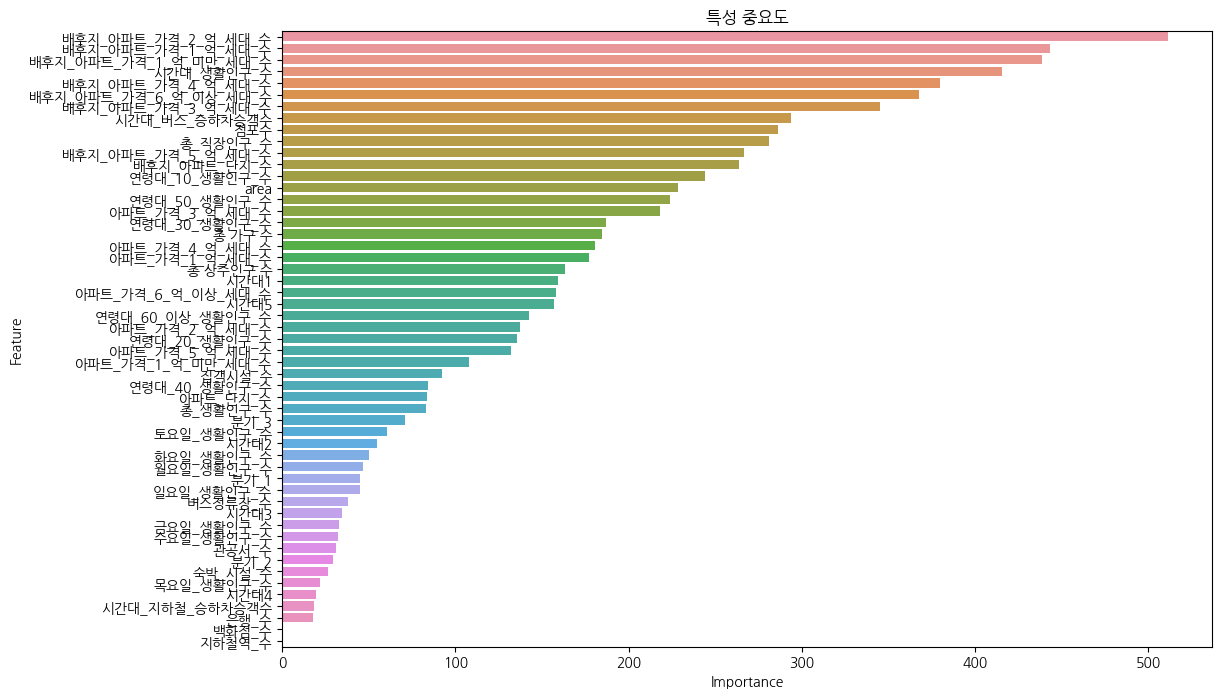

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 2: {'objective': 'regression', 'num_leaves': 37, 'n_estimators': 215, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 43}
Fold 3: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 4: {'objective': 'regression', 'num_leaves': 37, 'n_estimators': 215, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 43}
Fold 5: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}


In [12]:
#k폴드, 라이트gbm 베이스라인 코드

data_base_gol = pd.read_csv('골목상권_데이터230914.csv')

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수','시간대_생활인구_수', 
        '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수',
       '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수']

X = data_base_gol[features]
y = data_base_gol['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

## 1번. 생활인구 합치기(생활인구 관련 = 총 생활인구, 시간대(각 행별) 생활인구만 남기기

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 150473	training's l2: 2.26421e+10	valid_1's rmse: 138997	valid_1's l2: 1.93203e+10
[2]	training's rmse: 144758	training's l2: 2.0955e+10	valid_1's rmse: 134148	valid_1's l2: 1.79957e+10
[3]	training's rmse: 139378	training's l2: 1.94262e+10	valid_1's rmse: 129619	valid_1's l2: 1.68012e+10
[4]	training's rmse: 134323	training's l2: 1.80428e+10	valid_1's rmse: 125415	valid_1's l2: 1.5729e+10
[5]	training's rmse: 129579	training's l2: 1.67908e+10	valid_1's rmse: 121454	valid_1's l2: 1.47511e+10
[6]	training's rmse: 125146	training's l2: 1.56616e+10	valid_1's rmse: 117805	valid_1's l2: 1.3878e+10
[7]	training's rmse: 120951	training's l2: 1.46292e+10	valid_1's rmse: 114381	valid_1's l2: 1.3083e+10
[8]	training's rmse: 117014	training's l2: 1.36924e+10	valid_1's rmse: 111141	val

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 142872	training's l2: 2.04124e+10	valid_1's rmse: 175415	valid_1's l2: 3.07705e+10
[2]	training's rmse: 138840	training's l2: 1.92765e+10	valid_1's rmse: 171027	valid_1's l2: 2.92501e+10
[3]	training's rmse: 134998	training's l2: 1.82245e+10	valid_1's rmse: 166927	valid_1's l2: 2.78647e+10
[4]	training's rmse: 131285	training's l2: 1.72357e+10	valid_1's rmse: 162823	valid_1's l2: 2.65112e+10
[5]	training's rmse: 127711	training's l2: 1.63101e+10	valid_1's rmse: 158783	valid_1's l2: 2.52121e+10
[6]	training's rmse: 124381	training's l2: 1.54706e+10	valid_1's rmse: 155186	valid_1's l2: 2.40828e+10
[7]	training's rmse: 121129	training's l2: 1.46722e+10	valid_1's rmse: 151655	valid_1's l2: 2.29992e+10
[8]	training's rmse: 118065	training's l2: 1.39394e+10	valid_1's rmse: 148238

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 146781	training's l2: 2.15447e+10	valid_1's rmse: 161145	valid_1's l2: 2.59678e+10
[2]	training's rmse: 142636	training's l2: 2.0345e+10	valid_1's rmse: 157041	valid_1's l2: 2.46619e+10
[3]	training's rmse: 138702	training's l2: 1.92382e+10	valid_1's rmse: 153164	valid_1's l2: 2.34593e+10
[4]	training's rmse: 134841	training's l2: 1.81821e+10	valid_1's rmse: 149750	valid_1's l2: 2.24252e+10
[5]	training's rmse: 131199	training's l2: 1.72132e+10	valid_1's rmse: 146134	valid_1's l2: 2.13552e+10
[6]	training's rmse: 127803	training's l2: 1.63335e+10	valid_1's rmse: 142709	valid_1's l2: 2.03659e+10
[7]	training's rmse: 124302	training's l2: 1.5451e+10	valid_1's rmse: 139673	valid_1's l2: 1.95086e+10
[8]	training's rmse: 120998	training's l2: 1.46406e+10	valid_1's rmse: 136675	v

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 153910	training's l2: 2.36881e+10	valid_1's rmse: 131341	valid_1's l2: 1.72506e+10
[2]	training's rmse: 149362	training's l2: 2.2309e+10	valid_1's rmse: 127300	valid_1's l2: 1.62052e+10
[3]	training's rmse: 145005	training's l2: 2.10264e+10	valid_1's rmse: 123545	valid_1's l2: 1.52635e+10
[4]	training's rmse: 140864	training's l2: 1.98427e+10	valid_1's rmse: 119985	valid_1's l2: 1.43965e+10
[5]	training's rmse: 136938	training's l2: 1.8752e+10	valid_1's rmse: 116637	valid_1's l2: 1.36043e+10
[6]	training's rmse: 133316	training's l2: 1.77732e+10	valid_1's rmse: 113563	valid_1's l2: 1.28966e+10
[7]	training's rmse: 129765	training's l2: 1.68389e+10	valid_1's rmse: 110543	valid_1's l2: 1.22197e+10
[8]	training's rmse: 126496	training's l2: 1.60013e+10	valid_1's rmse: 107711	v

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 152328	training's l2: 2.32037e+10	valid_1's rmse: 137853	valid_1's l2: 1.90035e+10
[2]	training's rmse: 147872	training's l2: 2.18662e+10	valid_1's rmse: 133937	valid_1's l2: 1.79392e+10
[3]	training's rmse: 143658	training's l2: 2.06376e+10	valid_1's rmse: 130268	valid_1's l2: 1.69696e+10
[4]	training's rmse: 139642	training's l2: 1.94999e+10	valid_1's rmse: 126771	valid_1's l2: 1.60708e+10
[5]	training's rmse: 135833	training's l2: 1.84505e+10	valid_1's rmse: 123453	valid_1's l2: 1.52407e+10
[6]	training's rmse: 132196	training's l2: 1.74757e+10	valid_1's rmse: 120309	valid_1's l2: 1.44742e+10
[7]	training's rmse: 128700	training's l2: 1.65636e+10	valid_1's rmse: 117116	valid_1's l2: 1.37162e+10
[8]	training's rmse: 125384	training's l2: 1.57212e+10	valid_1's rmse: 114162

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 50382.45875872562
평균 MAE: 29443.2929163149
                   Feature  Importance
31     배후지_아파트_가격_2_억_세대_수       672.4
30     배후지_아파트_가격_1_억_세대_수       632.2
22              시간대_생활인구_수       570.4
29  배후지_아파트_가격_1_억_미만_세대_수       541.0
35  배후지_아파트_가격_6_억_이상_세대_수       502.4
33     배후지_아파트_가격_4_억_세대_수       473.6
32     배후지_아파트_가격_3_억_세대_수       463.8
21                총_생활인구_수       434.4
34     배후지_아파트_가격_5_억_세대_수       423.0
8                     area       369.4
9                      점포수       368.8
28            배후지_아파트_단지_수       357.8
12                총_직장인구_수       356.6
36           시간대_버스_승하차승객수       348.6
17         아파트_가격_3_억_세대_수       307.4
15         아파트_가격_1_억_세대_수       266.0
18         아파트_가격_4_억_세대_수       258.2
20      아파트_가격_6_억_이상_세대_수       249.4
10                총 상주인구 수       244.0
11                  총 가구 수       232.0
16         아파트_가격_2_억_세대_수       231.0
19         아파트_가격_5_억_세대_수       195.8
0                     시간대1       190.6
4           

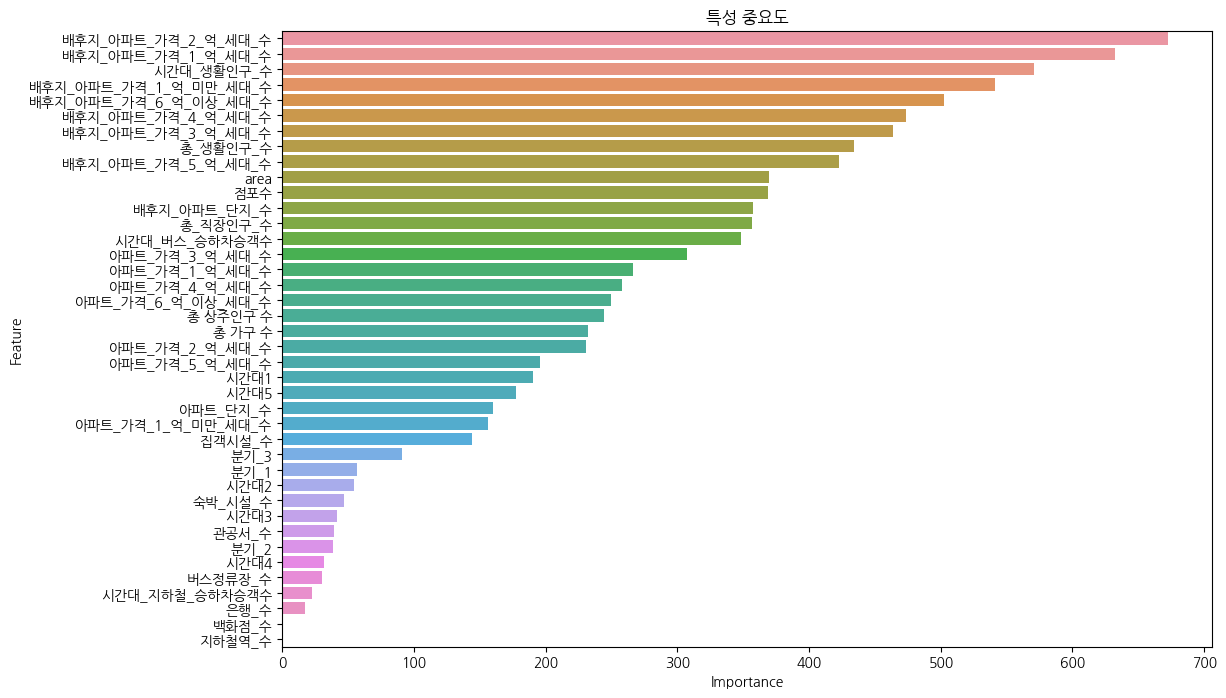

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 2: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 3: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 4: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 5: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}


In [16]:
# 데이터 로드
data1 = pd.read_csv('골목상권_데이터230914.csv')

#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수','시간대_생활인구_수',
        '집객시설_수', '관공서_수', '은행_수', '백화점_수', '숙박_시설_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수']
X = data1[features]
y = data1['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

## 2번. 생활인구 합치기(생활인구 관련 = 시간대(각 행별) 생활인구만 남기기

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 151834	training's l2: 2.30537e+10	valid_1's rmse: 140028	valid_1's l2: 1.96079e+10
[2]	training's rmse: 147345	training's l2: 2.17105e+10	valid_1's rmse: 136102	valid_1's l2: 1.85236e+10
[3]	training's rmse: 143079	training's l2: 2.04715e+10	valid_1's rmse: 132343	valid_1's l2: 1.75147e+10
[4]	training's rmse: 139013	training's l2: 1.93245e+10	valid_1's rmse: 128778	valid_1's l2: 1.65839e+10
[5]	training's rmse: 135144	training's l2: 1.82639e+10	valid_1's rmse: 125311	valid_1's l2: 1.57029e+10
[6]	training's rmse: 131467	training's l2: 1.72835e+10	valid_1's rmse: 122175	valid_1's l2: 1.49268e+10
[7]	training's rmse: 127976	training's l2: 1.63779e+10	valid_1's rmse: 119158	valid_1's l2: 1.41985e+10
[8]	training's rmse: 124651	training's l2: 1.55379e+10	valid_1's rmse: 116300

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 142764	training's l2: 2.03814e+10	valid_1's rmse: 175435	valid_1's l2: 3.07773e+10
[2]	training's rmse: 138687	training's l2: 1.9234e+10	valid_1's rmse: 170953	valid_1's l2: 2.92248e+10
[3]	training's rmse: 134765	training's l2: 1.81615e+10	valid_1's rmse: 166611	valid_1's l2: 2.77592e+10
[4]	training's rmse: 131105	training's l2: 1.71885e+10	valid_1's rmse: 162627	valid_1's l2: 2.64477e+10
[5]	training's rmse: 127560	training's l2: 1.62716e+10	valid_1's rmse: 158727	valid_1's l2: 2.51942e+10
[6]	training's rmse: 124085	training's l2: 1.53971e+10	valid_1's rmse: 154879	valid_1's l2: 2.39876e+10
[7]	training's rmse: 120656	training's l2: 1.45579e+10	valid_1's rmse: 151119	valid_1's l2: 2.28369e+10
[8]	training's rmse: 117395	training's l2: 1.37816e+10	valid_1's rmse: 147654	

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 146795	training's l2: 2.15487e+10	valid_1's rmse: 161077	valid_1's l2: 2.59458e+10
[2]	training's rmse: 142656	training's l2: 2.03507e+10	valid_1's rmse: 156857	valid_1's l2: 2.46041e+10
[3]	training's rmse: 138729	training's l2: 1.92456e+10	valid_1's rmse: 152900	valid_1's l2: 2.33785e+10
[4]	training's rmse: 134780	training's l2: 1.81657e+10	valid_1's rmse: 149219	valid_1's l2: 2.22662e+10
[5]	training's rmse: 131060	training's l2: 1.71767e+10	valid_1's rmse: 145506	valid_1's l2: 2.11719e+10
[6]	training's rmse: 127632	training's l2: 1.62899e+10	valid_1's rmse: 142065	valid_1's l2: 2.01825e+10
[7]	training's rmse: 124298	training's l2: 1.545e+10	valid_1's rmse: 139060	valid_1's l2: 1.93377e+10
[8]	training's rmse: 121167	training's l2: 1.46813e+10	valid_1's rmse: 136178	v

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 153860	training's l2: 2.3673e+10	valid_1's rmse: 131333	valid_1's l2: 1.72484e+10
[2]	training's rmse: 149262	training's l2: 2.22793e+10	valid_1's rmse: 127289	valid_1's l2: 1.62026e+10
[3]	training's rmse: 144895	training's l2: 2.09944e+10	valid_1's rmse: 123473	valid_1's l2: 1.52456e+10
[4]	training's rmse: 140747	training's l2: 1.98096e+10	valid_1's rmse: 119854	valid_1's l2: 1.43649e+10
[5]	training's rmse: 136810	training's l2: 1.87171e+10	valid_1's rmse: 116414	valid_1's l2: 1.35523e+10
[6]	training's rmse: 132981	training's l2: 1.76838e+10	valid_1's rmse: 113138	valid_1's l2: 1.28002e+10
[7]	training's rmse: 129350	training's l2: 1.67314e+10	valid_1's rmse: 110033	valid_1's l2: 1.21072e+10
[8]	training's rmse: 125944	training's l2: 1.58619e+10	valid_1's rmse: 106992	

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=43, early_stopping_rounds=43 will be ignored. Current value: early_stopping_round=43
[1]	training's rmse: 150971	training's l2: 2.27921e+10	valid_1's rmse: 136673	valid_1's l2: 1.86796e+10
[2]	training's rmse: 145309	training's l2: 2.11148e+10	valid_1's rmse: 131737	valid_1's l2: 1.73547e+10
[3]	training's rmse: 140003	training's l2: 1.9601e+10	valid_1's rmse: 127146	valid_1's l2: 1.61661e+10
[4]	training's rmse: 134967	training's l2: 1.82161e+10	valid_1's rmse: 122853	valid_1's l2: 1.50928e+10
[5]	training's rmse: 130296	training's l2: 1.69771e+10	valid_1's rmse: 118869	valid_1's l2: 1.41298e+10
[6]	training's rmse: 125969	training's l2: 1.58683e+10	valid_1's rmse: 115097	valid_1's l2: 1.32473e+10
[7]	training's rmse: 121880	training's l2: 1.48547e+10	valid_1's rmse: 111542	valid_1's l2: 1.24415e+10
[8]	training's rmse: 118157	training's l2: 1.39611e+10	valid_1's rmse: 108423	

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 49597.94557661018
평균 MAE: 29072.589388842654
                   Feature  Importance
30     배후지_아파트_가격_2_억_세대_수       588.8
21              시간대_생활인구_수       547.2
29     배후지_아파트_가격_1_억_세대_수       525.4
28  배후지_아파트_가격_1_억_미만_세대_수       452.8
34  배후지_아파트_가격_6_억_이상_세대_수       413.0
32     배후지_아파트_가격_4_억_세대_수       401.2
31     배후지_아파트_가격_3_억_세대_수       398.4
9                      점포수       362.2
12                총_직장인구_수       349.0
8                     area       340.0
35           시간대_버스_승하차승객수       332.6
33     배후지_아파트_가격_5_억_세대_수       319.8
17         아파트_가격_3_억_세대_수       302.8
27            배후지_아파트_단지_수       294.4
15         아파트_가격_1_억_세대_수       247.4
20      아파트_가격_6_억_이상_세대_수       239.6
10                총 상주인구 수       234.8
18         아파트_가격_4_억_세대_수       232.4
16         아파트_가격_2_억_세대_수       220.6
11                  총 가구 수       214.4
0                     시간대1       176.2
19         아파트_가격_5_억_세대_수       166.8
4                     시간대5       165.0
14      아파

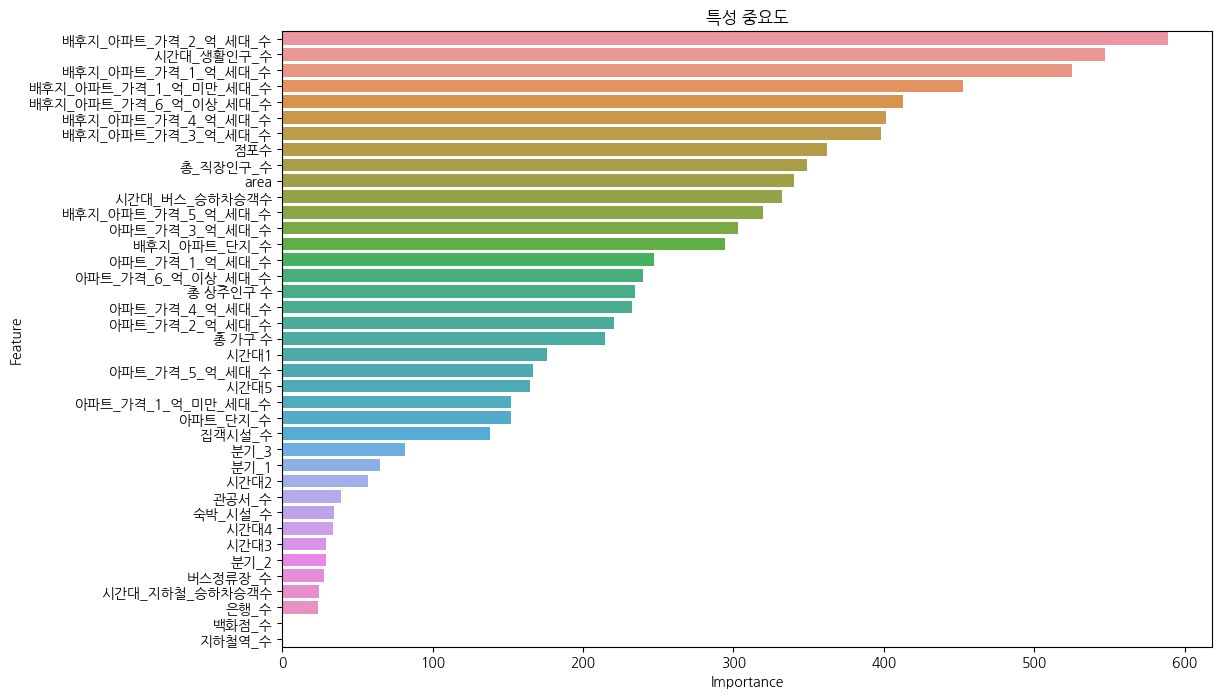

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 2: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 3: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 4: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 5: {'objective': 'regression', 'num_leaves': 37, 'n_estimators': 215, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 43}


In [17]:
# 데이터 로드
data2 = pd.read_csv('골목상권_데이터230914.csv')

#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '시간대_생활인구_수',
        '집객시설_수', '관공서_수', '은행_수', '백화점_수', '숙박_시설_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수']

X = data1[features]
y = data1['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

## 3번. 생활인구 평일/주말(나머지는 삭제)

In [20]:
data3 = pd.read_csv('data/Final/골목상권_230914.csv')

# 월요일부터 금요일까지의 생활인구 수 컬럼 이름
columns_to_sum1 = ['월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수', '금요일_생활인구_수']
columns_to_sum2 = ['토요일_생활인구_수', '일요일_생활인구_수']

# data3 데이터프레임에서 해당 컬럼을 더하고 각 5, 2로 나누어서 평일, 주말 생활인구수 컬럼 생성
data3['평일_생활인구_평균'] = data3[columns_to_sum1].sum(axis=1) / 5
data3['주말_생활인구_평균'] = data3[columns_to_sum2].sum(axis=1) / 2

data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2472 non-null   int64  
 1   매출                      2472 non-null   float64
 2   기준_년_코드                 2472 non-null   int64  
 3   상권_구분_코드_명              2472 non-null   object 
 4   상권_코드                   2472 non-null   int64  
 5   상권_코드_명                 2472 non-null   object 
 6   시간대1                    2472 non-null   int64  
 7   시간대2                    2472 non-null   int64  
 8   시간대3                    2472 non-null   int64  
 9   시간대4                    2472 non-null   int64  
 10  시간대5                    2472 non-null   int64  
 11  분기_1                    2472 non-null   int64  
 12  분기_2                    2472 non-null   int64  
 13  분기_3                    2472 non-null   int64  
 14  area                    2472 non-null   

In [21]:
data3 = data3.drop(['월요일_생활인구_수','화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수', '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수'], axis=1)
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2472 non-null   int64  
 1   매출                      2472 non-null   float64
 2   기준_년_코드                 2472 non-null   int64  
 3   상권_구분_코드_명              2472 non-null   object 
 4   상권_코드                   2472 non-null   int64  
 5   상권_코드_명                 2472 non-null   object 
 6   시간대1                    2472 non-null   int64  
 7   시간대2                    2472 non-null   int64  
 8   시간대3                    2472 non-null   int64  
 9   시간대4                    2472 non-null   int64  
 10  시간대5                    2472 non-null   int64  
 11  분기_1                    2472 non-null   int64  
 12  분기_2                    2472 non-null   int64  
 13  분기_3                    2472 non-null   int64  
 14  area                    2472 non-null   

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 150503	training's l2: 2.26511e+10	valid_1's rmse: 138373	valid_1's l2: 1.91471e+10
[2]	training's rmse: 144908	training's l2: 2.09983e+10	valid_1's rmse: 133104	valid_1's l2: 1.77168e+10
[3]	training's rmse: 139665	training's l2: 1.95063e+10	valid_1's rmse: 128177	valid_1's l2: 1.64294e+10
[4]	training's rmse: 134745	training's l2: 1.81561e+10	valid_1's rmse: 123501	valid_1's l2: 1.52524e+10
[5]	training's rmse: 130129	training's l2: 1.69335e+10	valid_1's rmse: 119219	valid_1's l2: 1.42131e+10
[6]	training's rmse: 125823	training's l2: 1.58314e+10	valid_1's rmse: 115197	valid_1's l2: 1.32704e+10
[7]	training's rmse: 121778	training's l2: 1.48298e+10	valid_1's rmse: 111471	valid_1's l2: 1.24259e+10
[8]	training's rmse: 117921	training's l2: 1.39053e+10	valid_1's rmse: 108182

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 141375	training's l2: 1.99869e+10	valid_1's rmse: 173720	valid_1's l2: 3.01786e+10
[2]	training's rmse: 136015	training's l2: 1.85002e+10	valid_1's rmse: 167766	valid_1's l2: 2.81453e+10
[3]	training's rmse: 131065	training's l2: 1.71782e+10	valid_1's rmse: 162241	valid_1's l2: 2.63223e+10
[4]	training's rmse: 126316	training's l2: 1.59556e+10	valid_1's rmse: 156995	valid_1's l2: 2.46474e+10
[5]	training's rmse: 121890	training's l2: 1.48573e+10	valid_1's rmse: 152111	valid_1's l2: 2.31377e+10
[6]	training's rmse: 117723	training's l2: 1.38586e+10	valid_1's rmse: 147502	valid_1's l2: 2.1757e+10
[7]	training's rmse: 113749	training's l2: 1.29389e+10	valid_1's rmse: 143116	valid_1's l2: 2.04822e+10
[8]	training's rmse: 110052	training's l2: 1.21113e+10	valid_1's rmse: 139072	

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 145340	training's l2: 2.11236e+10	valid_1's rmse: 160309	valid_1's l2: 2.56991e+10
[2]	training's rmse: 139870	training's l2: 1.95635e+10	valid_1's rmse: 155494	valid_1's l2: 2.41783e+10
[3]	training's rmse: 134701	training's l2: 1.81444e+10	valid_1's rmse: 151004	valid_1's l2: 2.28023e+10
[4]	training's rmse: 129906	training's l2: 1.68755e+10	valid_1's rmse: 146327	valid_1's l2: 2.14117e+10
[5]	training's rmse: 125276	training's l2: 1.56941e+10	valid_1's rmse: 142651	valid_1's l2: 2.03493e+10
[6]	training's rmse: 120975	training's l2: 1.46351e+10	valid_1's rmse: 138399	valid_1's l2: 1.91543e+10
[7]	training's rmse: 117214	training's l2: 1.3739e+10	valid_1's rmse: 135096	valid_1's l2: 1.8251e+10
[8]	training's rmse: 113397	training's l2: 1.28588e+10	valid_1's rmse: 131440	v

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 152445	training's l2: 2.32394e+10	valid_1's rmse: 130408	valid_1's l2: 1.70062e+10
[2]	training's rmse: 146660	training's l2: 2.15091e+10	valid_1's rmse: 125618	valid_1's l2: 1.578e+10
[3]	training's rmse: 141208	training's l2: 1.99396e+10	valid_1's rmse: 120925	valid_1's l2: 1.46229e+10
[4]	training's rmse: 136041	training's l2: 1.85072e+10	valid_1's rmse: 116389	valid_1's l2: 1.35464e+10
[5]	training's rmse: 131196	training's l2: 1.72123e+10	valid_1's rmse: 112582	valid_1's l2: 1.26746e+10
[6]	training's rmse: 126710	training's l2: 1.60555e+10	valid_1's rmse: 108603	valid_1's l2: 1.17947e+10
[7]	training's rmse: 122403	training's l2: 1.49825e+10	valid_1's rmse: 104927	valid_1's l2: 1.10098e+10
[8]	training's rmse: 118451	training's l2: 1.40307e+10	valid_1's rmse: 101431	v

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 152253	training's l2: 2.31811e+10	valid_1's rmse: 137556	valid_1's l2: 1.89216e+10
[2]	training's rmse: 147746	training's l2: 2.18288e+10	valid_1's rmse: 133289	valid_1's l2: 1.77658e+10
[3]	training's rmse: 143491	training's l2: 2.05897e+10	valid_1's rmse: 129286	valid_1's l2: 1.67148e+10
[4]	training's rmse: 139479	training's l2: 1.94544e+10	valid_1's rmse: 125527	valid_1's l2: 1.5757e+10
[5]	training's rmse: 135639	training's l2: 1.83981e+10	valid_1's rmse: 122067	valid_1's l2: 1.49004e+10
[6]	training's rmse: 131958	training's l2: 1.74128e+10	valid_1's rmse: 118637	valid_1's l2: 1.40746e+10
[7]	training's rmse: 128498	training's l2: 1.65116e+10	valid_1's rmse: 115432	valid_1's l2: 1.33245e+10
[8]	training's rmse: 125071	training's l2: 1.56428e+10	valid_1's rmse: 112186	

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 42474.55520043748
평균 MAE: 23445.965600404954
                   Feature  Importance
22              시간대_생활인구_수      1821.8
9                      점포수       931.2
30           연령대_10_생활인구_수       628.0
4                     시간대5       467.2
31           연령대_20_생활인구_수       452.2
42     배후지_아파트_가격_5_억_세대_수       429.4
44           시간대_버스_승하차승객수       422.0
34           연령대_50_생활인구_수       420.8
35        연령대_60_이상_생활인구_수       411.6
32           연령대_30_생활인구_수       409.0
10                총 상주인구 수       366.8
21                총_생활인구_수       359.4
0                     시간대1       349.4
24              주말_생활인구_평균       315.2
8                     area       308.8
33           연령대_40_생활인구_수       273.8
25                  집객시설_수       264.2
43  배후지_아파트_가격_6_억_이상_세대_수       263.6
40     배후지_아파트_가격_3_억_세대_수       261.0
41     배후지_아파트_가격_4_억_세대_수       258.0
37  배후지_아파트_가격_1_억_미만_세대_수       245.6
19         아파트_가격_5_억_세대_수       240.4
20      아파트_가격_6_억_이상_세대_수       223.0
18        

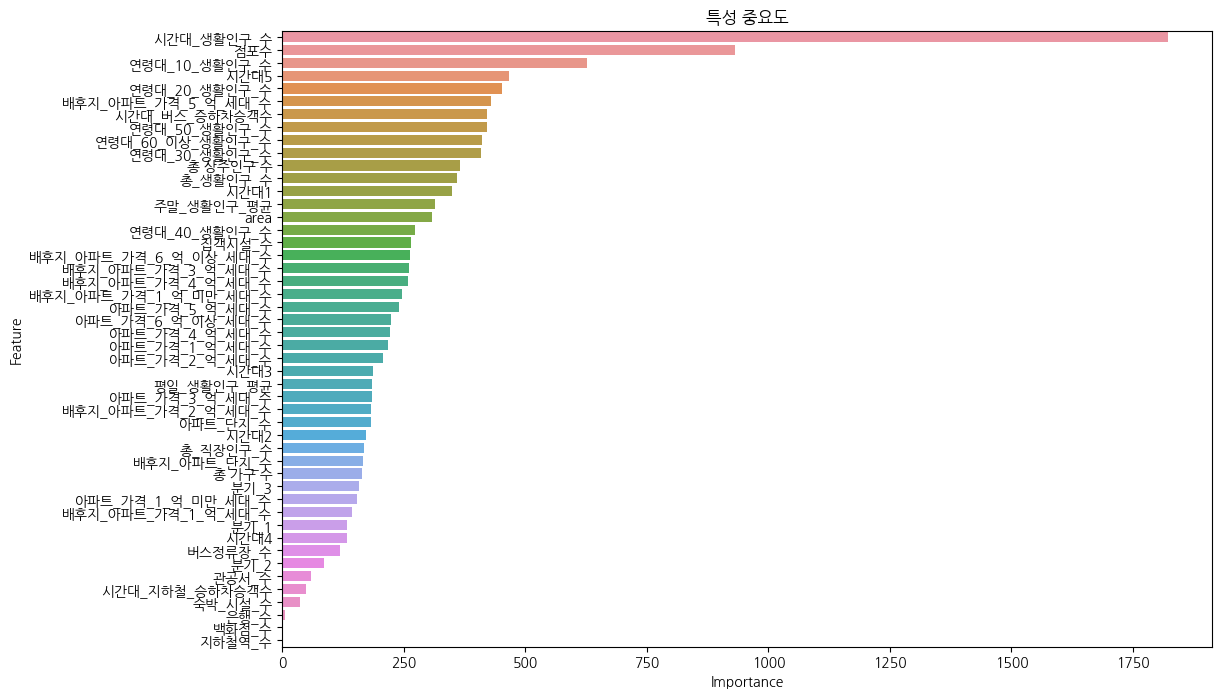

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 2: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 3: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 4: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 5: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}


In [22]:
#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수','시간대_생활인구_수', 
        '평일_생활인구_평균', '주말_생활인구_평균', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수',
       '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수']

X = data3[features]
y = data3['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

## 4. 생활인구 데이터 = 시간대 생활인구 + 평일/주말(총 생활인구 수만 삭제)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 150503	training's l2: 2.26511e+10	valid_1's rmse: 138373	valid_1's l2: 1.91471e+10
[2]	training's rmse: 144908	training's l2: 2.09983e+10	valid_1's rmse: 133104	valid_1's l2: 1.77168e+10
[3]	training's rmse: 139665	training's l2: 1.95063e+10	valid_1's rmse: 128177	valid_1's l2: 1.64294e+10
[4]	training's rmse: 134745	training's l2: 1.81561e+10	valid_1's rmse: 123501	valid_1's l2: 1.52524e+10
[5]	training's rmse: 130129	training's l2: 1.69335e+10	valid_1's rmse: 119219	valid_1's l2: 1.42131e+10
[6]	training's rmse: 125823	training's l2: 1.58314e+10	valid_1's rmse: 115197	valid_1's l2: 1.32704e+10
[7]	training's rmse: 121778	training's l2: 1.48298e+10	valid_1's rmse: 111471	valid_1's l2: 1.24259e+10
[8]	training's rmse: 117921	training's l2: 1.39053e+10	valid_1's rmse: 108182

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 141375	training's l2: 1.99869e+10	valid_1's rmse: 173720	valid_1's l2: 3.01786e+10
[2]	training's rmse: 136015	training's l2: 1.85002e+10	valid_1's rmse: 167766	valid_1's l2: 2.81453e+10
[3]	training's rmse: 131065	training's l2: 1.71782e+10	valid_1's rmse: 162241	valid_1's l2: 2.63223e+10
[4]	training's rmse: 126316	training's l2: 1.59556e+10	valid_1's rmse: 156995	valid_1's l2: 2.46474e+10
[5]	training's rmse: 121890	training's l2: 1.48573e+10	valid_1's rmse: 152111	valid_1's l2: 2.31377e+10
[6]	training's rmse: 117723	training's l2: 1.38586e+10	valid_1's rmse: 147502	valid_1's l2: 2.1757e+10
[7]	training's rmse: 113749	training's l2: 1.29389e+10	valid_1's rmse: 143116	valid_1's l2: 2.04822e+10
[8]	training's rmse: 110052	training's l2: 1.21113e+10	valid_1's rmse: 139072	

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 145340	training's l2: 2.11236e+10	valid_1's rmse: 160309	valid_1's l2: 2.56991e+10
[2]	training's rmse: 139870	training's l2: 1.95635e+10	valid_1's rmse: 155494	valid_1's l2: 2.41783e+10
[3]	training's rmse: 134701	training's l2: 1.81444e+10	valid_1's rmse: 151004	valid_1's l2: 2.28023e+10
[4]	training's rmse: 129906	training's l2: 1.68755e+10	valid_1's rmse: 146327	valid_1's l2: 2.14117e+10
[5]	training's rmse: 125276	training's l2: 1.56941e+10	valid_1's rmse: 142651	valid_1's l2: 2.03493e+10
[6]	training's rmse: 120975	training's l2: 1.46351e+10	valid_1's rmse: 138399	valid_1's l2: 1.91543e+10
[7]	training's rmse: 117214	training's l2: 1.3739e+10	valid_1's rmse: 135096	valid_1's l2: 1.8251e+10
[8]	training's rmse: 113397	training's l2: 1.28588e+10	valid_1's rmse: 131440	v

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 152445	training's l2: 2.32394e+10	valid_1's rmse: 130408	valid_1's l2: 1.70062e+10
[2]	training's rmse: 146660	training's l2: 2.15091e+10	valid_1's rmse: 125618	valid_1's l2: 1.578e+10
[3]	training's rmse: 141208	training's l2: 1.99396e+10	valid_1's rmse: 120925	valid_1's l2: 1.46229e+10
[4]	training's rmse: 136041	training's l2: 1.85072e+10	valid_1's rmse: 116389	valid_1's l2: 1.35464e+10
[5]	training's rmse: 131196	training's l2: 1.72123e+10	valid_1's rmse: 112582	valid_1's l2: 1.26746e+10
[6]	training's rmse: 126710	training's l2: 1.60555e+10	valid_1's rmse: 108603	valid_1's l2: 1.17947e+10
[7]	training's rmse: 122403	training's l2: 1.49825e+10	valid_1's rmse: 104927	valid_1's l2: 1.10098e+10
[8]	training's rmse: 118451	training's l2: 1.40307e+10	valid_1's rmse: 101431	v

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 150914	training's l2: 2.27749e+10	valid_1's rmse: 136268	valid_1's l2: 1.85689e+10
[2]	training's rmse: 145255	training's l2: 2.10991e+10	valid_1's rmse: 130966	valid_1's l2: 1.71522e+10
[3]	training's rmse: 139878	training's l2: 1.95658e+10	valid_1's rmse: 125855	valid_1's l2: 1.58395e+10
[4]	training's rmse: 134888	training's l2: 1.81948e+10	valid_1's rmse: 121226	valid_1's l2: 1.46958e+10
[5]	training's rmse: 130207	training's l2: 1.69539e+10	valid_1's rmse: 117024	valid_1's l2: 1.36946e+10
[6]	training's rmse: 125715	training's l2: 1.58043e+10	valid_1's rmse: 112791	valid_1's l2: 1.27218e+10
[7]	training's rmse: 121507	training's l2: 1.4764e+10	valid_1's rmse: 108779	valid_1's l2: 1.18329e+10
[8]	training's rmse: 117561	training's l2: 1.38206e+10	valid_1's rmse: 105098	

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 42465.84377867896
평균 MAE: 23336.350956884377
                   Feature  Importance
21              시간대_생활인구_수      2043.6
9                      점포수       984.2
29           연령대_10_생활인구_수       704.8
30           연령대_20_생활인구_수       511.6
22              평일_생활인구_평균       473.6
33           연령대_50_생활인구_수       473.4
4                     시간대5       471.4
43           시간대_버스_승하차승객수       465.6
34        연령대_60_이상_생활인구_수       464.2
31           연령대_30_생활인구_수       455.2
41     배후지_아파트_가격_5_억_세대_수       453.2
10                총 상주인구 수       402.4
23              주말_생활인구_평균       395.2
0                     시간대1       365.4
8                     area       336.0
32           연령대_40_생활인구_수       306.4
40     배후지_아파트_가격_4_억_세대_수       304.6
42  배후지_아파트_가격_6_억_이상_세대_수       304.0
24                  집객시설_수       284.8
39     배후지_아파트_가격_3_억_세대_수       272.4
36  배후지_아파트_가격_1_억_미만_세대_수       270.8
18         아파트_가격_4_억_세대_수       255.6
19         아파트_가격_5_억_세대_수       254.6
20      아파

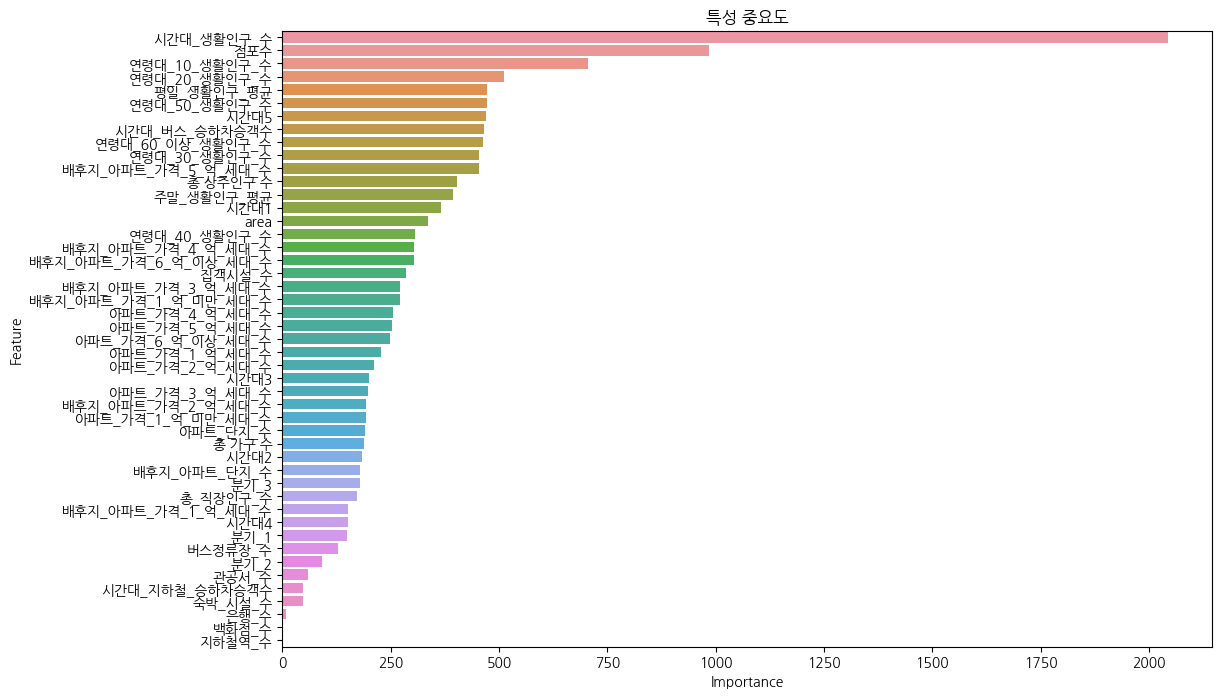

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 2: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 3: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 4: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 5: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}


In [23]:
#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '시간대_생활인구_수', 
        '평일_생활인구_평균', '주말_생활인구_평균', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수',
       '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수']

X = data3[features]
y = data3['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

## 5. 생활인구 데이터 = 시간대 생활인구 + 평일/주말만(총생활/연령별 삭제)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 150515	training's l2: 2.26549e+10	valid_1's rmse: 138367	valid_1's l2: 1.91454e+10
[2]	training's rmse: 144931	training's l2: 2.10051e+10	valid_1's rmse: 133154	valid_1's l2: 1.773e+10
[3]	training's rmse: 139714	training's l2: 1.95201e+10	valid_1's rmse: 128297	valid_1's l2: 1.64601e+10
[4]	training's rmse: 134796	training's l2: 1.817e+10	valid_1's rmse: 123646	valid_1's l2: 1.52884e+10
[5]	training's rmse: 130192	training's l2: 1.69501e+10	valid_1's rmse: 119425	valid_1's l2: 1.42623e+10
[6]	training's rmse: 125906	training's l2: 1.58522e+10	valid_1's rmse: 115393	valid_1's l2: 1.33155e+10
[7]	training's rmse: 121906	training's l2: 1.48611e+10	valid_1's rmse: 111645	valid_1's l2: 1.24646e+10
[8]	training's rmse: 118064	training's l2: 1.39392e+10	valid_1's rmse: 108019	val

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 141482	training's l2: 2.00171e+10	valid_1's rmse: 173884	valid_1's l2: 3.02355e+10
[2]	training's rmse: 136255	training's l2: 1.85655e+10	valid_1's rmse: 168111	valid_1's l2: 2.82612e+10
[3]	training's rmse: 131321	training's l2: 1.72452e+10	valid_1's rmse: 162641	valid_1's l2: 2.6452e+10
[4]	training's rmse: 126708	training's l2: 1.6055e+10	valid_1's rmse: 157518	valid_1's l2: 2.4812e+10
[5]	training's rmse: 122354	training's l2: 1.49704e+10	valid_1's rmse: 152715	valid_1's l2: 2.33217e+10
[6]	training's rmse: 118311	training's l2: 1.39974e+10	valid_1's rmse: 148238	valid_1's l2: 2.19745e+10
[7]	training's rmse: 114492	training's l2: 1.31084e+10	valid_1's rmse: 144043	valid_1's l2: 2.07484e+10
[8]	training's rmse: 110882	training's l2: 1.22948e+10	valid_1's rmse: 140071	va

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 145413	training's l2: 2.11449e+10	valid_1's rmse: 160165	valid_1's l2: 2.56528e+10
[2]	training's rmse: 139979	training's l2: 1.95942e+10	valid_1's rmse: 155193	valid_1's l2: 2.40849e+10
[3]	training's rmse: 134863	training's l2: 1.8188e+10	valid_1's rmse: 150556	valid_1's l2: 2.26673e+10
[4]	training's rmse: 130189	training's l2: 1.69493e+10	valid_1's rmse: 145753	valid_1's l2: 2.12441e+10
[5]	training's rmse: 125713	training's l2: 1.58038e+10	valid_1's rmse: 141716	valid_1's l2: 2.00833e+10
[6]	training's rmse: 121535	training's l2: 1.47707e+10	valid_1's rmse: 137557	valid_1's l2: 1.8922e+10
[7]	training's rmse: 117587	training's l2: 1.38267e+10	valid_1's rmse: 133520	valid_1's l2: 1.78275e+10
[8]	training's rmse: 113751	training's l2: 1.29394e+10	valid_1's rmse: 130182	v

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 152463	training's l2: 2.32451e+10	valid_1's rmse: 130406	valid_1's l2: 1.70057e+10
[2]	training's rmse: 146784	training's l2: 2.15456e+10	valid_1's rmse: 125650	valid_1's l2: 1.57879e+10
[3]	training's rmse: 141480	training's l2: 2.00167e+10	valid_1's rmse: 120939	valid_1's l2: 1.46262e+10
[4]	training's rmse: 136509	training's l2: 1.86346e+10	valid_1's rmse: 116582	valid_1's l2: 1.35914e+10
[5]	training's rmse: 131747	training's l2: 1.73573e+10	valid_1's rmse: 112740	valid_1's l2: 1.27102e+10
[6]	training's rmse: 127347	training's l2: 1.62174e+10	valid_1's rmse: 108785	valid_1's l2: 1.18341e+10
[7]	training's rmse: 123244	training's l2: 1.51891e+10	valid_1's rmse: 105254	valid_1's l2: 1.10784e+10
[8]	training's rmse: 119097	training's l2: 1.41841e+10	valid_1's rmse: 102021

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 151049	training's l2: 2.28158e+10	valid_1's rmse: 136358	valid_1's l2: 1.85934e+10
[2]	training's rmse: 145459	training's l2: 2.11584e+10	valid_1's rmse: 131084	valid_1's l2: 1.7183e+10
[3]	training's rmse: 140267	training's l2: 1.96749e+10	valid_1's rmse: 126229	valid_1's l2: 1.59336e+10
[4]	training's rmse: 135382	training's l2: 1.83283e+10	valid_1's rmse: 121674	valid_1's l2: 1.48045e+10
[5]	training's rmse: 130685	training's l2: 1.70786e+10	valid_1's rmse: 117209	valid_1's l2: 1.3738e+10
[6]	training's rmse: 126311	training's l2: 1.59544e+10	valid_1's rmse: 113040	valid_1's l2: 1.27779e+10
[7]	training's rmse: 122175	training's l2: 1.49268e+10	valid_1's rmse: 109063	valid_1's l2: 1.18946e+10
[8]	training's rmse: 118401	training's l2: 1.40189e+10	valid_1's rmse: 105678	v

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 40749.732563311074
평균 MAE: 22590.37301300063
                   Feature  Importance
21              시간대_생활인구_수      2410.0
9                      점포수      1243.6
22              평일_생활인구_평균      1012.6
23              주말_생활인구_평균       737.2
35     배후지_아파트_가격_5_억_세대_수       608.8
37           시간대_버스_승하차승객수       520.0
4                     시간대5       474.6
10                총 상주인구 수       433.8
34     배후지_아파트_가격_4_억_세대_수       397.6
8                     area       394.0
0                     시간대1       372.6
33     배후지_아파트_가격_3_억_세대_수       362.2
24                  집객시설_수       353.2
19         아파트_가격_5_억_세대_수       352.8
36  배후지_아파트_가격_6_억_이상_세대_수       342.2
30  배후지_아파트_가격_1_억_미만_세대_수       323.0
20      아파트_가격_6_억_이상_세대_수       297.2
18         아파트_가격_4_억_세대_수       292.0
15         아파트_가격_1_억_세대_수       290.2
17         아파트_가격_3_억_세대_수       284.0
16         아파트_가격_2_억_세대_수       275.6
32     배후지_아파트_가격_2_억_세대_수       234.4
12                총_직장인구_수       222.6
29        

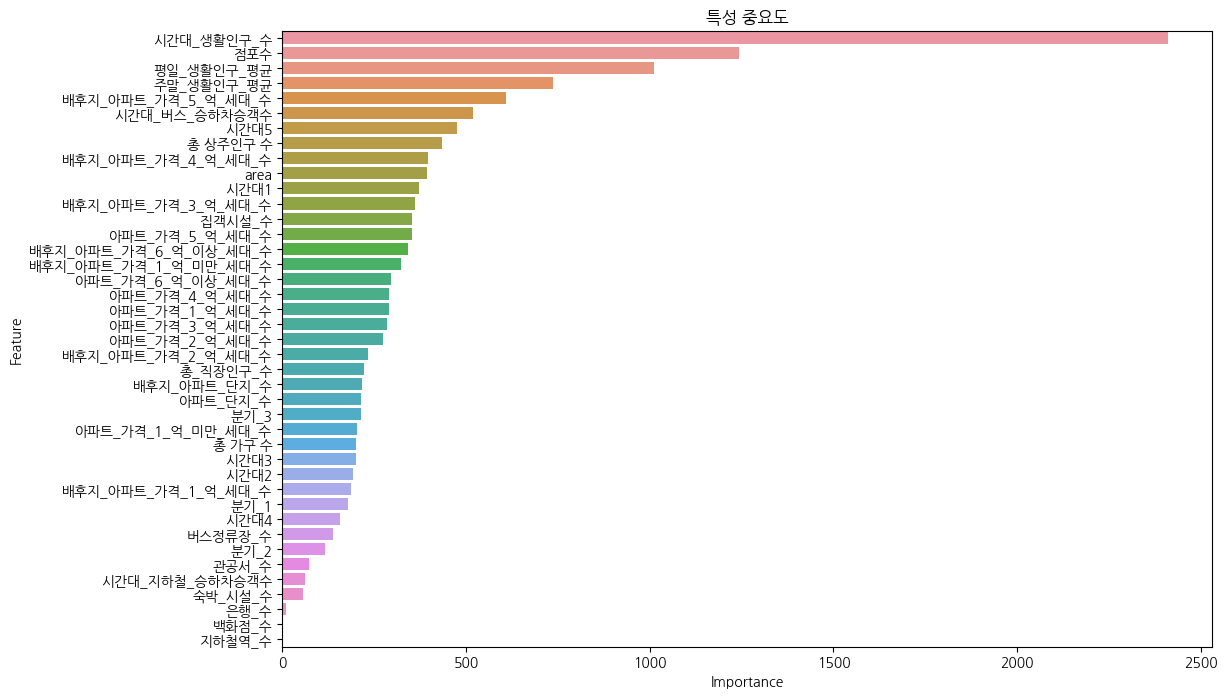

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 2: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 3: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 4: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 5: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}


In [24]:
#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '시간대_생활인구_수', 
        '평일_생활인구_평균', '주말_생활인구_평균', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수']

X = data3[features]
y = data3['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

## 6. 생활인구 데이터 = 생활인구 그대로 연령별 합치기(MZ가 힘을합치면...?)

In [27]:
data4 = pd.read_csv('골목상권_데이터230914.csv')

data4['연령대_2030_생활인구_수'] = data4['연령대_20_생활인구_수'] + data4['연령대_30_생활인구_수']
data4['연령대_4050_생활인구_수'] = data4['연령대_40_생활인구_수'] + data4['연령대_50_생활인구_수']

data4 = data4.drop(['연령대_20_생활인구_수', '연령대_30_생활인구_수'], axis=1)
data4 = data4.drop(['연령대_40_생활인구_수', '연령대_50_생활인구_수'], axis=1)
# data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   매출                      2472 non-null   float64
 1   기준_년_코드                 2472 non-null   int64  
 2   상권_구분_코드_명              2472 non-null   object 
 3   상권_코드                   2472 non-null   int64  
 4   상권_코드_명                 2472 non-null   object 
 5   점포수                     2472 non-null   int64  
 6   시간대1                    2472 non-null   int64  
 7   시간대2                    2472 non-null   int64  
 8   시간대3                    2472 non-null   int64  
 9   시간대4                    2472 non-null   int64  
 10  시간대5                    2472 non-null   int64  
 11  분기_1                    2472 non-null   int64  
 12  분기_2                    2472 non-null   int64  
 13  분기_3                    2472 non-null   int64  
 14  총 상주인구 수                2472 non-null   

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 151907	training's l2: 2.30758e+10	valid_1's rmse: 140035	valid_1's l2: 1.96099e+10
[2]	training's rmse: 147456	training's l2: 2.17432e+10	valid_1's rmse: 136013	valid_1's l2: 1.84994e+10
[3]	training's rmse: 143244	training's l2: 2.05188e+10	valid_1's rmse: 132188	valid_1's l2: 1.74736e+10
[4]	training's rmse: 139232	training's l2: 1.93857e+10	valid_1's rmse: 128599	valid_1's l2: 1.65378e+10
[5]	training's rmse: 135586	training's l2: 1.83836e+10	valid_1's rmse: 125420	valid_1's l2: 1.57301e+10
[6]	training's rmse: 131832	training's l2: 1.73796e+10	valid_1's rmse: 122301	valid_1's l2: 1.49575e+10
[7]	training's rmse: 128303	training's l2: 1.64616e+10	valid_1's rmse: 119409	valid_1's l2: 1.42586e+10
[8]	training's rmse: 124911	training's l2: 1.56027e+10	valid_1's rmse: 116583

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 142983	training's l2: 2.0444e+10	valid_1's rmse: 175584	valid_1's l2: 3.08297e+10
[2]	training's rmse: 139155	training's l2: 1.93642e+10	valid_1's rmse: 171303	valid_1's l2: 2.93446e+10
[3]	training's rmse: 135468	training's l2: 1.83515e+10	valid_1's rmse: 167282	valid_1's l2: 2.79833e+10
[4]	training's rmse: 131777	training's l2: 1.73652e+10	valid_1's rmse: 163199	valid_1's l2: 2.6634e+10
[5]	training's rmse: 128199	training's l2: 1.64351e+10	valid_1's rmse: 159326	valid_1's l2: 2.53848e+10
[6]	training's rmse: 124913	training's l2: 1.56032e+10	valid_1's rmse: 155667	valid_1's l2: 2.42323e+10
[7]	training's rmse: 121598	training's l2: 1.4786e+10	valid_1's rmse: 151963	valid_1's l2: 2.30927e+10
[8]	training's rmse: 118414	training's l2: 1.40219e+10	valid_1's rmse: 148595	va

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 146720	training's l2: 2.15267e+10	valid_1's rmse: 161099	valid_1's l2: 2.5953e+10
[2]	training's rmse: 142520	training's l2: 2.03118e+10	valid_1's rmse: 156978	valid_1's l2: 2.46421e+10
[3]	training's rmse: 138528	training's l2: 1.91899e+10	valid_1's rmse: 153094	valid_1's l2: 2.34379e+10
[4]	training's rmse: 134599	training's l2: 1.8117e+10	valid_1's rmse: 149597	valid_1's l2: 2.23792e+10
[5]	training's rmse: 130956	training's l2: 1.71496e+10	valid_1's rmse: 146030	valid_1's l2: 2.13249e+10
[6]	training's rmse: 127576	training's l2: 1.62755e+10	valid_1's rmse: 142710	valid_1's l2: 2.03663e+10
[7]	training's rmse: 124082	training's l2: 1.53964e+10	valid_1's rmse: 139836	valid_1's l2: 1.95541e+10
[8]	training's rmse: 120794	training's l2: 1.45912e+10	valid_1's rmse: 137041	v

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 153934	training's l2: 2.36957e+10	valid_1's rmse: 131509	valid_1's l2: 1.72947e+10
[2]	training's rmse: 149409	training's l2: 2.2323e+10	valid_1's rmse: 127641	valid_1's l2: 1.62921e+10
[3]	training's rmse: 145113	training's l2: 2.10578e+10	valid_1's rmse: 123956	valid_1's l2: 1.53651e+10
[4]	training's rmse: 140829	training's l2: 1.98327e+10	valid_1's rmse: 120219	valid_1's l2: 1.44525e+10
[5]	training's rmse: 136771	training's l2: 1.87063e+10	valid_1's rmse: 116705	valid_1's l2: 1.362e+10
[6]	training's rmse: 132914	training's l2: 1.76661e+10	valid_1's rmse: 113424	valid_1's l2: 1.28651e+10
[7]	training's rmse: 129245	training's l2: 1.67044e+10	valid_1's rmse: 110267	valid_1's l2: 1.21588e+10
[8]	training's rmse: 125717	training's l2: 1.58048e+10	valid_1's rmse: 107238	va

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=43, early_stopping_rounds=43 will be ignored. Current value: early_stopping_round=43
[1]	training's rmse: 150952	training's l2: 2.27865e+10	valid_1's rmse: 136406	valid_1's l2: 1.86065e+10
[2]	training's rmse: 145272	training's l2: 2.1104e+10	valid_1's rmse: 131208	valid_1's l2: 1.72155e+10
[3]	training's rmse: 139951	training's l2: 1.95864e+10	valid_1's rmse: 126340	valid_1's l2: 1.59617e+10
[4]	training's rmse: 134963	training's l2: 1.82151e+10	valid_1's rmse: 121817	valid_1's l2: 1.48394e+10
[5]	training's rmse: 130292	training's l2: 1.69759e+10	valid_1's rmse: 117599	valid_1's l2: 1.38296e+10
[6]	training's rmse: 125897	training's l2: 1.58501e+10	valid_1's rmse: 113676	valid_1's l2: 1.29223e+10
[7]	training's rmse: 121624	training's l2: 1.47923e+10	valid_1's rmse: 109797	valid_1's l2: 1.20553e+10
[8]	training's rmse: 117608	training's l2: 1.38317e+10	valid_1's rmse: 106158	

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 50100.19454032334
평균 MAE: 29195.87306286615
                   Feature  Importance
42     배후지_아파트_가격_2_억_세대_수       546.0
41     배후지_아파트_가격_1_억_세대_수       462.6
40  배후지_아파트_가격_1_억_미만_세대_수       448.6
22              시간대_생활인구_수       400.2
44     배후지_아파트_가격_4_억_세대_수       367.4
46  배후지_아파트_가격_6_억_이상_세대_수       365.4
43     배후지_아파트_가격_3_억_세대_수       363.2
47           시간대_버스_승하차승객수       321.0
9                      점포수       308.6
39            배후지_아파트_단지_수       288.0
12                총_직장인구_수       284.8
45     배후지_아파트_가격_5_억_세대_수       275.8
8                     area       252.8
35           연령대_10_생활인구_수       251.2
36         연령대_2030_생활인구_수       222.8
17         아파트_가격_3_억_세대_수       221.0
15         아파트_가격_1_억_세대_수       205.6
38        연령대_60_이상_생활인구_수       203.2
18         아파트_가격_4_억_세대_수       194.8
20      아파트_가격_6_억_이상_세대_수       187.2
11                  총 가구 수       186.4
10                총 상주인구 수       172.4
4                     시간대5       167.6
16         

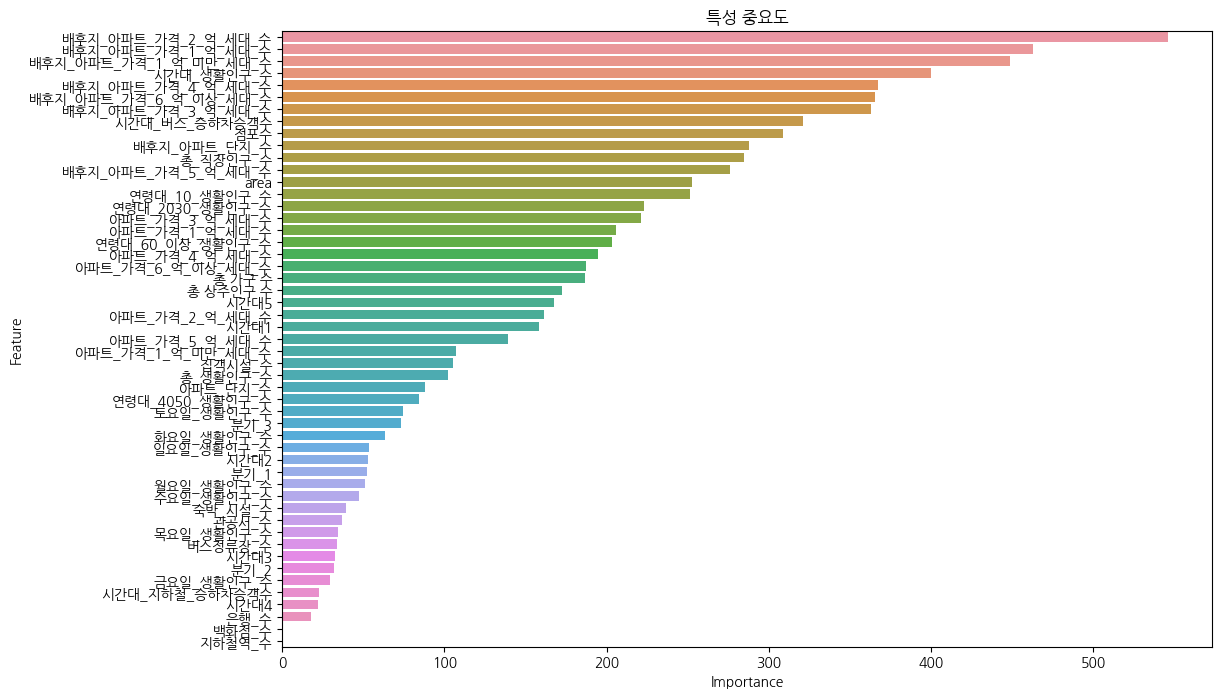

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 2: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 3: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 4: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 5: {'objective': 'regression', 'num_leaves': 37, 'n_estimators': 215, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 43}


In [29]:
#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수','시간대_생활인구_수', 
        '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', '연령대_10_생활인구_수', '연령대_2030_생활인구_수',
       '연령대_4050_생활인구_수', '연령대_60_이상_생활인구_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수']
X = data4[features]
y = data4['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

## 7. 직장인구를 비율으로 만들기

### 총 직장인구 수는 19년 이후로 동일하게 작성을 해서 사실 시간대 6 X 분기 4 X 연도 3 해서 다 있었다면
### 72가 맞겠지만 아닌 값들도 있었음

In [43]:
data5 = pd.read_csv('data/골목상권_데이터230914.csv')
data5['총_직장인구_수'].value_counts()

총_직장인구_수
1683     72
444      72
148      72
663      72
361      72
783      72
1556     72
1338     72
2179     72
10837    72
494      72
5085     72
1959     72
1724     72
268      72
317      72
273      72
578      72
292      72
962      72
117      72
3430     72
1251     72
994      72
271      72
2628     72
1522     72
780      72
1139     72
377      72
1542     72
166      60
1637     48
39       48
1594     42
636      42
Name: count, dtype: int64

### 왜? 총합본(=인코딩 전=시간대6 찢어지기 전)을 보자
### 매출데이터에 결측치가 있는 것이 다 달랐기 때문(연도별로) 그래서 없는 상권이 존재했다

In [33]:
ddado = pd.read_csv('data/Final/총합본(Center_Points).csv')
ddado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   기준_년_코드             914 non-null    int64  
 1   기준_분기_코드            914 non-null    int64  
 2   상권_코드               914 non-null    int64  
 3   점포수                 914 non-null    int64  
 4   시간대_00~06_매출_금액_평균  914 non-null    float64
 5   시간대_06~11_매출_금액_평균  914 non-null    float64
 6   시간대_11~14_매출_금액_평균  914 non-null    float64
 7   시간대_14~17_매출_금액_평균  914 non-null    float64
 8   시간대_17~21_매출_금액_평균  914 non-null    float64
 9   시간대_21~24_매출_금액_평균  914 non-null    float64
 10  총 상주인구 수            902 non-null    float64
 11  총 가구 수              902 non-null    float64
 12  아파트 가구 수            902 non-null    float64
 13  비아파트 가구 수           902 non-null    float64
 14  총_직장인구_수            914 non-null    float64
 15  아파트_단지_수            846 non-null    float64
 16  아파트_가격_1

In [34]:
ddado['상권_코드'].value_counts()

상권_코드
2110949    12
2120200    12
2120207    12
2120206    12
2120205    12
           ..
2110982    10
2110966     8
2111000     8
2110988     7
2110954     7
Name: count, Length: 78, dtype: int64

In [41]:
# 직장인구 비율을 구하기 위한 직장인구 총합계산

comp_numbers = [1683, 444, 148, 663, 361, 783, 1556, 1338, 2179, 10837, 494, 5085, 1959, 1724, 268, 317, 273, 578, 292, 962, 117, 3430, 1251, 994, 271, 2628, 1522, 780, 1139, 377, 1542, 166, 1637, 39, 1594, 636]
comp_total = sum(comp_numbers)
comp_total

50067

In [45]:
data5['총_직장인구_대비_비율'] = data5['총_직장인구_수'] / 500.67
data5 = data5.drop(columns=['총_직장인구_수'])
data5

,매출,기준_년_코드,상권_구분_코드_명,상권_코드,상권_코드_명,점포수,시간대1,시간대2,시간대3,시간대4,...,배후지_아파트_가격_2_억_세대_수,배후지_아파트_가격_3_억_세대_수,배후지_아파트_가격_4_억_세대_수,배후지_아파트_가격_5_억_세대_수,배후지_아파트_가격_6_억_이상_세대_수,시간대_버스_승하차승객수,시간대_지하철_승하차승객수,버스정류장_수,지하철역_수,총_직장인구_대비_비율
0,125163.15020,2020,골목상권,2110949,한남IC,6,1,0,0,0,...,614.170000,292.830000,149.092500,99.832500,1085.562500,0,0,0,0,3.361496
1,94688.22344,2020,골목상권,2110951,신사은행나무공원,3,1,0,0,0,...,614.357987,292.925346,149.132955,99.856597,1085.263984,0,0,0,0,0.545269
2,177736.46150,2020,골목상권,2110952,논현목련공원,3,1,0,0,0,...,614.485220,292.997815,149.161344,99.869870,1085.670761,0,0,0,0,0.233687
3,34587.75458,2020,골목상권,2110954,국기원,3,1,0,0,0,...,614.339589,293.068230,149.160578,99.877316,1086.065624,0,0,0,0,1.270298
4,221061.48320,2020,골목상권,2110955,논현초등학교,30,1,0,0,0,...,614.501397,293.162426,149.202311,99.898098,1086.489818,0,0,0,0,6.850820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,118941.35870,2022,골목상권,2110958,역삼역 4번,3,0,0,0,0,...,617.025602,295.324578,149.700920,99.421599,1092.132824,0,0,0,0,1.985340
2468,214056.82610,2022,골목상권,2110976,언북초등학교,3,0,0,0,0,...,617.068493,295.392671,149.719407,99.441591,1092.525272,0,0,0,0,1.154453
2469,340072.11410,2022,골목상권,2110961,언주역 3번,4,0,0,0,0,...,617.215365,295.435305,149.646478,99.421948,1092.285598,0,0,0,0,1.921425
2470,533322.40060,2022,골목상권,2110971,선정릉역 4번,7,0,0,0,0,...,617.069822,295.463799,149.654021,99.421714,1092.261037,0,0,0,0,3.079873


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 151819	training's l2: 2.30489e+10	valid_1's rmse: 139936	valid_1's l2: 1.95821e+10
[2]	training's rmse: 147280	training's l2: 2.16915e+10	valid_1's rmse: 135819	valid_1's l2: 1.84469e+10
[3]	training's rmse: 142948	training's l2: 2.04342e+10	valid_1's rmse: 131917	valid_1's l2: 1.74022e+10
[4]	training's rmse: 138900	training's l2: 1.92932e+10	valid_1's rmse: 128328	valid_1's l2: 1.64681e+10
[5]	training's rmse: 135019	training's l2: 1.82301e+10	valid_1's rmse: 124946	valid_1's l2: 1.56116e+10
[6]	training's rmse: 131330	training's l2: 1.72475e+10	valid_1's rmse: 121736	valid_1's l2: 1.48196e+10
[7]	training's rmse: 127838	training's l2: 1.63427e+10	valid_1's rmse: 118573	valid_1's l2: 1.40595e+10
[8]	training's rmse: 124481	training's l2: 1.54956e+10	valid_1's rmse: 115710

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=43, early_stopping_rounds=43 will be ignored. Current value: early_stopping_round=43
[1]	training's rmse: 141890	training's l2: 2.01328e+10	valid_1's rmse: 174312	valid_1's l2: 3.03845e+10
[2]	training's rmse: 136816	training's l2: 1.87185e+10	valid_1's rmse: 168824	valid_1's l2: 2.85015e+10
[3]	training's rmse: 131997	training's l2: 1.74233e+10	valid_1's rmse: 163540	valid_1's l2: 2.67453e+10
[4]	training's rmse: 127484	training's l2: 1.62521e+10	valid_1's rmse: 158537	valid_1's l2: 2.51341e+10
[5]	training's rmse: 123202	training's l2: 1.51787e+10	valid_1's rmse: 153840	valid_1's l2: 2.36667e+10
[6]	training's rmse: 118965	training's l2: 1.41526e+10	valid_1's rmse: 149482	valid_1's l2: 2.23449e+10
[7]	training's rmse: 114994	training's l2: 1.32237e+10	valid_1's rmse: 145379	valid_1's l2: 2.11351e+10
[8]	training's rmse: 111195	training's l2: 1.23644e+10	valid_1's rmse: 141533

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 146703	training's l2: 2.15218e+10	valid_1's rmse: 161107	valid_1's l2: 2.59556e+10
[2]	training's rmse: 142491	training's l2: 2.03036e+10	valid_1's rmse: 156978	valid_1's l2: 2.4642e+10
[3]	training's rmse: 138493	training's l2: 1.91802e+10	valid_1's rmse: 153092	valid_1's l2: 2.34371e+10
[4]	training's rmse: 134553	training's l2: 1.81044e+10	valid_1's rmse: 149592	valid_1's l2: 2.23778e+10
[5]	training's rmse: 130862	training's l2: 1.71248e+10	valid_1's rmse: 146071	valid_1's l2: 2.13366e+10
[6]	training's rmse: 127470	training's l2: 1.62487e+10	valid_1's rmse: 142761	valid_1's l2: 2.03808e+10
[7]	training's rmse: 123977	training's l2: 1.53704e+10	valid_1's rmse: 139896	valid_1's l2: 1.95708e+10
[8]	training's rmse: 120626	training's l2: 1.45506e+10	valid_1's rmse: 136943	

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=43, early_stopping_rounds=43 will be ignored. Current value: early_stopping_round=43
[1]	training's rmse: 152631	training's l2: 2.32963e+10	valid_1's rmse: 130289	valid_1's l2: 1.69752e+10
[2]	training's rmse: 146795	training's l2: 2.15488e+10	valid_1's rmse: 125254	valid_1's l2: 1.56885e+10
[3]	training's rmse: 141243	training's l2: 1.99495e+10	valid_1's rmse: 120511	valid_1's l2: 1.45228e+10
[4]	training's rmse: 136029	training's l2: 1.85038e+10	valid_1's rmse: 116024	valid_1's l2: 1.34616e+10
[5]	training's rmse: 131241	training's l2: 1.72242e+10	valid_1's rmse: 111990	valid_1's l2: 1.25417e+10
[6]	training's rmse: 126667	training's l2: 1.60445e+10	valid_1's rmse: 107970	valid_1's l2: 1.16576e+10
[7]	training's rmse: 122448	training's l2: 1.49936e+10	valid_1's rmse: 104427	valid_1's l2: 1.0905e+10
[8]	training's rmse: 118390	training's l2: 1.40162e+10	valid_1's rmse: 100937	

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 152289	training's l2: 2.31921e+10	valid_1's rmse: 137893	valid_1's l2: 1.90144e+10
[2]	training's rmse: 147781	training's l2: 2.18392e+10	valid_1's rmse: 134004	valid_1's l2: 1.7957e+10
[3]	training's rmse: 143460	training's l2: 2.05809e+10	valid_1's rmse: 130175	valid_1's l2: 1.69456e+10
[4]	training's rmse: 139409	training's l2: 1.94349e+10	valid_1's rmse: 126699	valid_1's l2: 1.60525e+10
[5]	training's rmse: 135553	training's l2: 1.83745e+10	valid_1's rmse: 123435	valid_1's l2: 1.52362e+10
[6]	training's rmse: 131867	training's l2: 1.73889e+10	valid_1's rmse: 120270	valid_1's l2: 1.44648e+10
[7]	training's rmse: 128283	training's l2: 1.64566e+10	valid_1's rmse: 116988	valid_1's l2: 1.36862e+10
[8]	training's rmse: 124845	training's l2: 1.55864e+10	valid_1's rmse: 113902	

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 49906.78446087152
평균 MAE: 29176.36633528758
                   Feature  Importance
44     배후지_아파트_가격_2_억_세대_수       511.2
43     배후지_아파트_가격_1_억_세대_수       443.2
42  배후지_아파트_가격_1_억_미만_세대_수       438.4
22              시간대_생활인구_수       415.2
46     배후지_아파트_가격_4_억_세대_수       379.4
48  배후지_아파트_가격_6_억_이상_세대_수       367.6
45     배후지_아파트_가격_3_억_세대_수       345.0
49           시간대_버스_승하차승객수       293.4
9                      점포수       286.2
12            총_직장인구_대비_비율       281.2
47     배후지_아파트_가격_5_억_세대_수       266.8
41            배후지_아파트_단지_수       263.8
35           연령대_10_생활인구_수       244.0
8                     area       228.2
39           연령대_50_생활인구_수       223.6
17         아파트_가격_3_억_세대_수       218.0
37           연령대_30_생활인구_수       186.8
11                  총 가구 수       184.6
18         아파트_가격_4_억_세대_수       180.8
15         아파트_가격_1_억_세대_수       177.2
10                총 상주인구 수       163.4
0                     시간대1       159.2
20      아파트_가격_6_억_이상_세대_수       157.8
4          

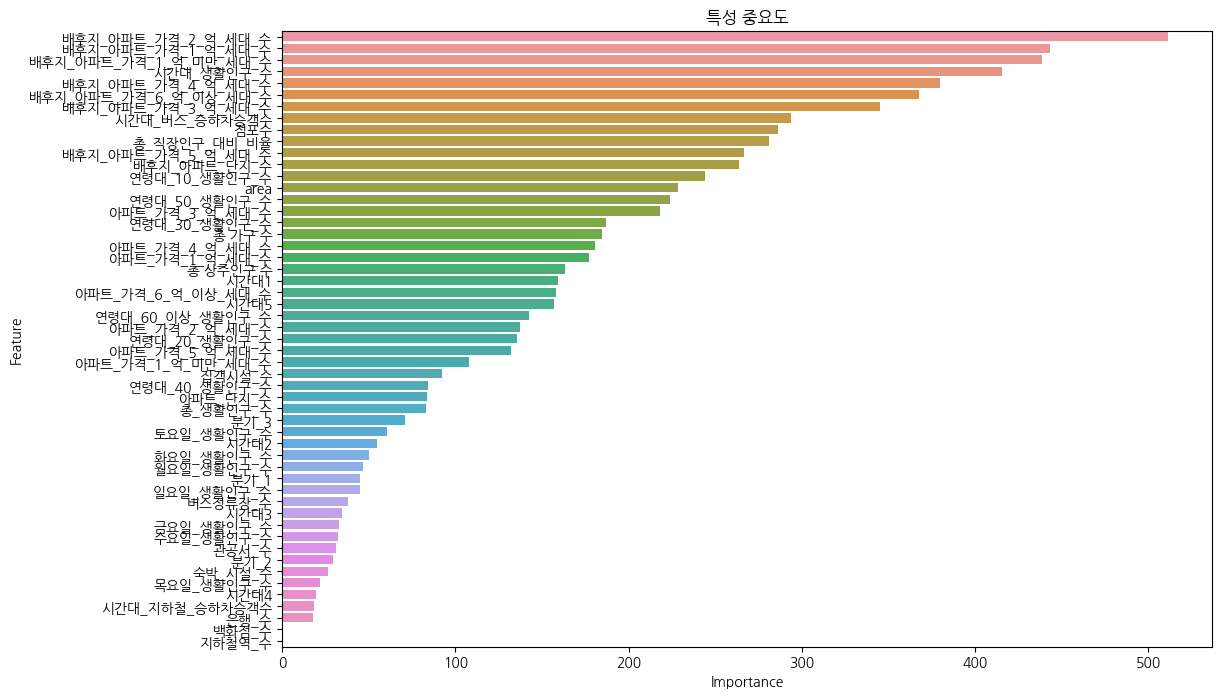

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 2: {'objective': 'regression', 'num_leaves': 37, 'n_estimators': 215, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 43}
Fold 3: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 4: {'objective': 'regression', 'num_leaves': 37, 'n_estimators': 215, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 43}
Fold 5: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}


In [47]:
#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_대비_비율', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수','시간대_생활인구_수', 
        '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수',
       '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수']
X = data5[features]
y = data5['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

## 8. 아파트 세대수들의 단순 합(배후지는 미실시)

In [48]:
data6 = pd.read_csv('data/Final/골목상권_230914.csv')

# 주어진 칼럼들의 합 구하기
data6['총_세대_수'] = data6[['아파트_가격_1_억_미만_세대_수', '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', 
               '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수', '아파트_가격_5_억_세대_수', 
               '아파트_가격_6_억_이상_세대_수']].sum(axis=1)

# 주어진 칼럼들 삭제
data6 = data6.drop(columns=['아파트_가격_1_억_미만_세대_수', '아파트_가격_1_억_세대_수', 
                              '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', 
                              '아파트_가격_4_억_세대_수', '아파트_가격_5_억_세대_수', 
                              '아파트_가격_6_억_이상_세대_수'])
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2472 non-null   int64  
 1   매출                      2472 non-null   float64
 2   기준_년_코드                 2472 non-null   int64  
 3   상권_구분_코드_명              2472 non-null   object 
 4   상권_코드                   2472 non-null   int64  
 5   상권_코드_명                 2472 non-null   object 
 6   시간대1                    2472 non-null   int64  
 7   시간대2                    2472 non-null   int64  
 8   시간대3                    2472 non-null   int64  
 9   시간대4                    2472 non-null   int64  
 10  시간대5                    2472 non-null   int64  
 11  분기_1                    2472 non-null   int64  
 12  분기_2                    2472 non-null   int64  
 13  분기_3                    2472 non-null   int64  
 14  area                    2472 non-null   

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 150525	training's l2: 2.26579e+10	valid_1's rmse: 138364	valid_1's l2: 1.91446e+10
[2]	training's rmse: 144858	training's l2: 2.09837e+10	valid_1's rmse: 132790	valid_1's l2: 1.76333e+10
[3]	training's rmse: 139538	training's l2: 1.94709e+10	valid_1's rmse: 127685	valid_1's l2: 1.63035e+10
[4]	training's rmse: 134511	training's l2: 1.80931e+10	valid_1's rmse: 122872	valid_1's l2: 1.50976e+10
[5]	training's rmse: 129833	training's l2: 1.68565e+10	valid_1's rmse: 118457	valid_1's l2: 1.40322e+10
[6]	training's rmse: 125408	training's l2: 1.57272e+10	valid_1's rmse: 114267	valid_1's l2: 1.30569e+10
[7]	training's rmse: 121272	training's l2: 1.47069e+10	valid_1's rmse: 110318	valid_1's l2: 1.21701e+10
[8]	training's rmse: 117409	training's l2: 1.37849e+10	valid_1's rmse: 106720

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 141501	training's l2: 2.00226e+10	valid_1's rmse: 173908	valid_1's l2: 3.02439e+10
[2]	training's rmse: 136287	training's l2: 1.8574e+10	valid_1's rmse: 168129	valid_1's l2: 2.82674e+10
[3]	training's rmse: 131362	training's l2: 1.72561e+10	valid_1's rmse: 162704	valid_1's l2: 2.64726e+10
[4]	training's rmse: 126764	training's l2: 1.60691e+10	valid_1's rmse: 157603	valid_1's l2: 2.48387e+10
[5]	training's rmse: 122434	training's l2: 1.49901e+10	valid_1's rmse: 152807	valid_1's l2: 2.335e+10
[6]	training's rmse: 118386	training's l2: 1.40152e+10	valid_1's rmse: 148315	valid_1's l2: 2.19972e+10
[7]	training's rmse: 114587	training's l2: 1.31301e+10	valid_1's rmse: 144133	valid_1's l2: 2.07743e+10
[8]	training's rmse: 110996	training's l2: 1.23202e+10	valid_1's rmse: 140160	va

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 145723	training's l2: 2.12352e+10	valid_1's rmse: 160416	valid_1's l2: 2.57334e+10
[2]	training's rmse: 140652	training's l2: 1.97831e+10	valid_1's rmse: 155671	valid_1's l2: 2.42334e+10
[3]	training's rmse: 135891	training's l2: 1.84663e+10	valid_1's rmse: 151243	valid_1's l2: 2.28745e+10
[4]	training's rmse: 131441	training's l2: 1.72767e+10	valid_1's rmse: 147183	valid_1's l2: 2.16628e+10
[5]	training's rmse: 127251	training's l2: 1.61929e+10	valid_1's rmse: 143356	valid_1's l2: 2.0551e+10
[6]	training's rmse: 123344	training's l2: 1.52139e+10	valid_1's rmse: 139762	valid_1's l2: 1.95334e+10
[7]	training's rmse: 119700	training's l2: 1.4328e+10	valid_1's rmse: 136476	valid_1's l2: 1.86258e+10
[8]	training's rmse: 116242	training's l2: 1.35122e+10	valid_1's rmse: 133241	v

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 152529	training's l2: 2.32651e+10	valid_1's rmse: 130236	valid_1's l2: 1.69613e+10
[2]	training's rmse: 146970	training's l2: 2.16001e+10	valid_1's rmse: 125324	valid_1's l2: 1.57061e+10
[3]	training's rmse: 141810	training's l2: 2.01102e+10	valid_1's rmse: 120672	valid_1's l2: 1.45617e+10
[4]	training's rmse: 136979	training's l2: 1.87632e+10	valid_1's rmse: 116313	valid_1's l2: 1.35287e+10
[5]	training's rmse: 132444	training's l2: 1.75414e+10	valid_1's rmse: 112289	valid_1's l2: 1.26088e+10
[6]	training's rmse: 128227	training's l2: 1.64422e+10	valid_1's rmse: 108475	valid_1's l2: 1.17669e+10
[7]	training's rmse: 124179	training's l2: 1.54205e+10	valid_1's rmse: 104768	valid_1's l2: 1.09764e+10
[8]	training's rmse: 120481	training's l2: 1.45156e+10	valid_1's rmse: 101480

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 151060	training's l2: 2.28191e+10	valid_1's rmse: 136465	valid_1's l2: 1.86228e+10
[2]	training's rmse: 145481	training's l2: 2.11648e+10	valid_1's rmse: 131287	valid_1's l2: 1.72362e+10
[3]	training's rmse: 140291	training's l2: 1.96815e+10	valid_1's rmse: 126455	valid_1's l2: 1.59908e+10
[4]	training's rmse: 135410	training's l2: 1.83357e+10	valid_1's rmse: 121924	valid_1's l2: 1.48655e+10
[5]	training's rmse: 130816	training's l2: 1.71128e+10	valid_1's rmse: 117782	valid_1's l2: 1.38725e+10
[6]	training's rmse: 126413	training's l2: 1.59802e+10	valid_1's rmse: 113600	valid_1's l2: 1.2905e+10
[7]	training's rmse: 122340	training's l2: 1.49671e+10	valid_1's rmse: 109772	valid_1's l2: 1.205e+10
[8]	training's rmse: 118551	training's l2: 1.40543e+10	valid_1's rmse: 106357	va

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 42511.040594783815
평균 MAE: 23353.02020933672
                   Feature  Importance
15              시간대_생활인구_수      2515.4
9                      점포수      1419.0
14                총_생활인구_수      1377.2
27     배후지_아파트_가격_5_억_세대_수       773.6
10                총 상주인구 수       580.8
25     배후지_아파트_가격_3_억_세대_수       539.0
26     배후지_아파트_가격_4_억_세대_수       535.8
22  배후지_아파트_가격_1_억_미만_세대_수       529.4
29           시간대_버스_승하차승객수       498.4
28  배후지_아파트_가격_6_억_이상_세대_수       493.6
8                     area       467.6
4                     시간대5       464.2
16                  집객시설_수       428.2
0                     시간대1       360.2
21            배후지_아파트_단지_수       333.2
13                아파트_단지_수       322.8
23     배후지_아파트_가격_1_억_세대_수       320.8
24     배후지_아파트_가격_2_억_세대_수       319.6
11                  총 가구 수       284.4
12                총_직장인구_수       281.0
33                  총_세대_수       277.0
7                     분기_3       234.2
5                     분기_1       204.6
2         

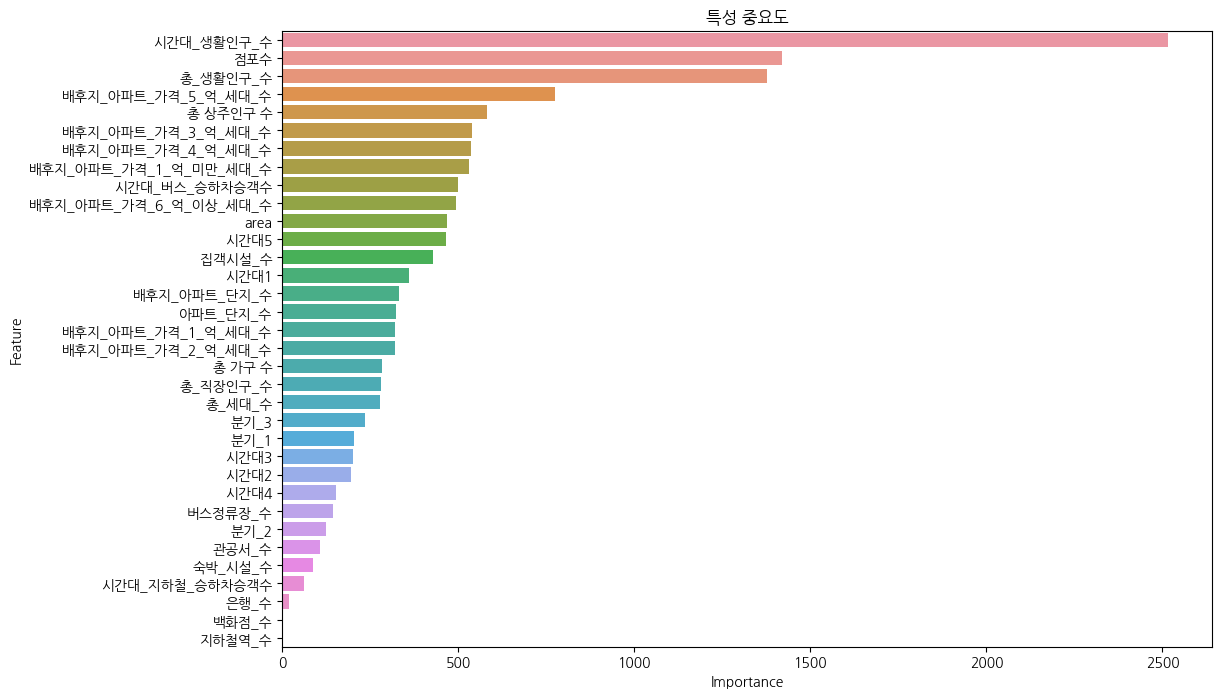

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 2: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 3: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 4: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 5: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}


In [49]:
#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '총_생활인구_수','시간대_생활인구_수',
        '집객시설_수', '관공서_수', '은행_수', '백화점_수', '숙박_시설_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수', '총_세대_수']
X = data6[features]
y = data6['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

## 9. 아파트 세대 수들의 단순 합(배후지까지)

In [51]:
# 주어진 칼럼들의 합 구하기
data6['총_배후지_세대_수'] = data6[['배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수']].sum(axis=1)

# 주어진 칼럼들 삭제
data6 = data6.drop(columns=['배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수'])
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2472 non-null   int64  
 1   매출                2472 non-null   float64
 2   기준_년_코드           2472 non-null   int64  
 3   상권_구분_코드_명        2472 non-null   object 
 4   상권_코드             2472 non-null   int64  
 5   상권_코드_명           2472 non-null   object 
 6   시간대1              2472 non-null   int64  
 7   시간대2              2472 non-null   int64  
 8   시간대3              2472 non-null   int64  
 9   시간대4              2472 non-null   int64  
 10  시간대5              2472 non-null   int64  
 11  분기_1              2472 non-null   int64  
 12  분기_2              2472 non-null   int64  
 13  분기_3              2472 non-null   int64  
 14  area              2472 non-null   int64  
 15  점포수               2472 non-null   float64
 16  총 상주인구 수          2472 non-null   float64


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 151219	training's l2: 2.28673e+10	valid_1's rmse: 139117	valid_1's l2: 1.93534e+10
[2]	training's rmse: 146044	training's l2: 2.13288e+10	valid_1's rmse: 134282	valid_1's l2: 1.80316e+10
[3]	training's rmse: 141385	training's l2: 1.99896e+10	valid_1's rmse: 129798	valid_1's l2: 1.68474e+10
[4]	training's rmse: 136854	training's l2: 1.87291e+10	valid_1's rmse: 125513	valid_1's l2: 1.57536e+10
[5]	training's rmse: 132531	training's l2: 1.75646e+10	valid_1's rmse: 121544	valid_1's l2: 1.47731e+10
[6]	training's rmse: 128554	training's l2: 1.6526e+10	valid_1's rmse: 117778	valid_1's l2: 1.38716e+10
[7]	training's rmse: 124776	training's l2: 1.5569e+10	valid_1's rmse: 114341	valid_1's l2: 1.30738e+10
[8]	training's rmse: 121252	training's l2: 1.47019e+10	valid_1's rmse: 111007	v

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 142068	training's l2: 2.01832e+10	valid_1's rmse: 175308	valid_1's l2: 3.07328e+10
[2]	training's rmse: 137428	training's l2: 1.88866e+10	valid_1's rmse: 170927	valid_1's l2: 2.92159e+10
[3]	training's rmse: 133118	training's l2: 1.77205e+10	valid_1's rmse: 166947	valid_1's l2: 2.78714e+10
[4]	training's rmse: 129088	training's l2: 1.66636e+10	valid_1's rmse: 163130	valid_1's l2: 2.66113e+10
[5]	training's rmse: 125128	training's l2: 1.56569e+10	valid_1's rmse: 159179	valid_1's l2: 2.53379e+10
[6]	training's rmse: 121505	training's l2: 1.47634e+10	valid_1's rmse: 156005	valid_1's l2: 2.43375e+10
[7]	training's rmse: 117881	training's l2: 1.38959e+10	valid_1's rmse: 152554	valid_1's l2: 2.32728e+10
[8]	training's rmse: 114683	training's l2: 1.31522e+10	valid_1's rmse: 149434

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 145616	training's l2: 2.12041e+10	valid_1's rmse: 160603	valid_1's l2: 2.57934e+10
[2]	training's rmse: 140432	training's l2: 1.9721e+10	valid_1's rmse: 156008	valid_1's l2: 2.43385e+10
[3]	training's rmse: 135520	training's l2: 1.83657e+10	valid_1's rmse: 151387	valid_1's l2: 2.29181e+10
[4]	training's rmse: 130939	training's l2: 1.71449e+10	valid_1's rmse: 147042	valid_1's l2: 2.16213e+10
[5]	training's rmse: 126654	training's l2: 1.60413e+10	valid_1's rmse: 143060	valid_1's l2: 2.04661e+10
[6]	training's rmse: 122734	training's l2: 1.50636e+10	valid_1's rmse: 139390	valid_1's l2: 1.94295e+10
[7]	training's rmse: 118992	training's l2: 1.41592e+10	valid_1's rmse: 136021	valid_1's l2: 1.85018e+10
[8]	training's rmse: 115608	training's l2: 1.33651e+10	valid_1's rmse: 132971	

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 152973	training's l2: 2.34006e+10	valid_1's rmse: 130482	valid_1's l2: 1.70255e+10
[2]	training's rmse: 147848	training's l2: 2.1859e+10	valid_1's rmse: 125844	valid_1's l2: 1.58366e+10
[3]	training's rmse: 142959	training's l2: 2.04372e+10	valid_1's rmse: 121228	valid_1's l2: 1.46962e+10
[4]	training's rmse: 138309	training's l2: 1.91293e+10	valid_1's rmse: 116990	valid_1's l2: 1.36866e+10
[5]	training's rmse: 134016	training's l2: 1.79602e+10	valid_1's rmse: 113174	valid_1's l2: 1.28083e+10
[6]	training's rmse: 130097	training's l2: 1.69253e+10	valid_1's rmse: 109582	valid_1's l2: 1.20083e+10
[7]	training's rmse: 126318	training's l2: 1.59563e+10	valid_1's rmse: 106281	valid_1's l2: 1.12957e+10
[8]	training's rmse: 122755	training's l2: 1.50687e+10	valid_1's rmse: 103143	

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 152252	training's l2: 2.31808e+10	valid_1's rmse: 137811	valid_1's l2: 1.89918e+10
[2]	training's rmse: 147703	training's l2: 2.18162e+10	valid_1's rmse: 133800	valid_1's l2: 1.79024e+10
[3]	training's rmse: 143837	training's l2: 2.06891e+10	valid_1's rmse: 129765	valid_1's l2: 1.68388e+10
[4]	training's rmse: 140020	training's l2: 1.96057e+10	valid_1's rmse: 125841	valid_1's l2: 1.58359e+10
[5]	training's rmse: 136534	training's l2: 1.86414e+10	valid_1's rmse: 122218	valid_1's l2: 1.49372e+10
[6]	training's rmse: 133068	training's l2: 1.77071e+10	valid_1's rmse: 118679	valid_1's l2: 1.40848e+10
[7]	training's rmse: 129797	training's l2: 1.68473e+10	valid_1's rmse: 115266	valid_1's l2: 1.32862e+10
[8]	training's rmse: 126773	training's l2: 1.60714e+10	valid_1's rmse: 112150

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 44002.69270531303
평균 MAE: 23934.30650959123
           Feature  Importance
15      시간대_생활인구_수      2440.0
9              점포수      1586.0
14        총_생활인구_수      1449.2
10        총 상주인구 수       880.2
27      총_배후지_세대_수       732.0
8             area       712.6
21    배후지_아파트_단지_수       672.8
22   시간대_버스_승하차승객수       623.2
16          집객시설_수       480.2
4             시간대5       444.4
26          총_세대_수       443.4
13        아파트_단지_수       418.4
12        총_직장인구_수       386.4
11          총 가구 수       385.0
0             시간대1       329.0
7             분기_3       190.6
1             시간대2       184.8
2             시간대3       179.2
5             분기_1       164.2
24         버스정류장_수       150.0
20         숙박_시설_수       139.8
17           관공서_수       136.8
3             시간대4       129.2
6             분기_2       109.2
23  시간대_지하철_승하차승객수        44.8
18            은행_수        26.2
19           백화점_수         0.0
25          지하철역_수         0.0


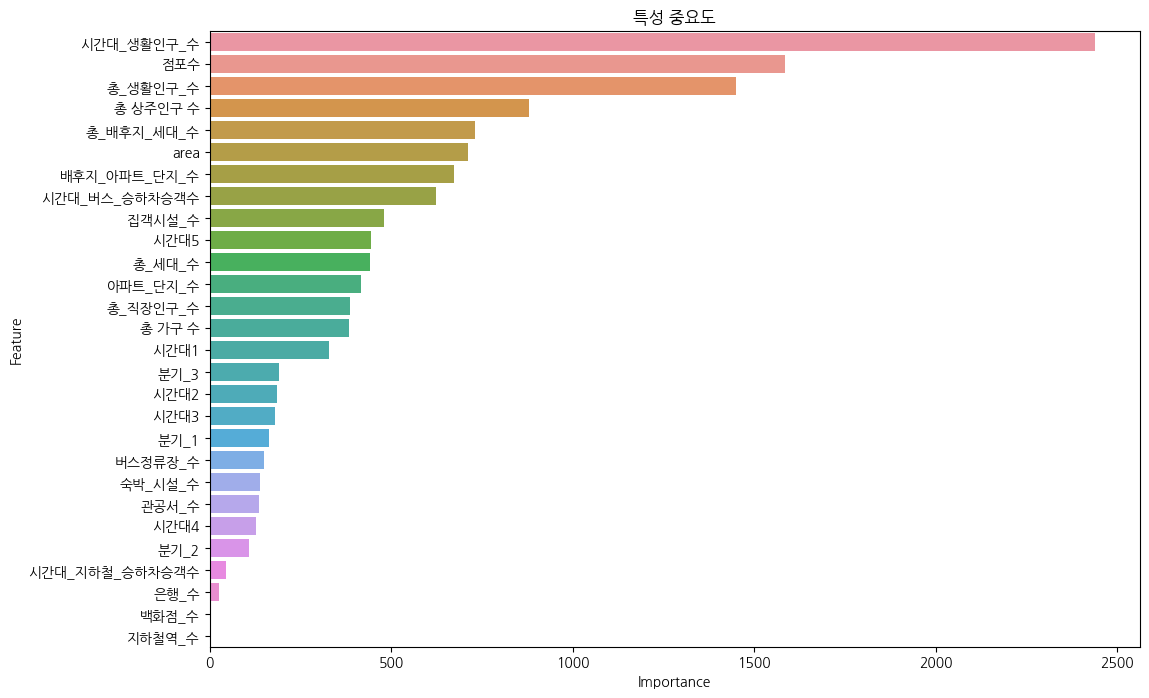

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 2: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 3: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 4: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 5: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}


In [52]:
#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '총_생활인구_수','시간대_생활인구_수',
        '집객시설_수', '관공서_수', '은행_수', '백화점_수', '숙박_시설_수', '배후지_아파트_단지_수',
       '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수', '지하철역_수', '총_세대_수',  '총_배후지_세대_수']

X = data6[features]
y = data6['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

## 10. 아파트 세대 수들의 단순 합(배후지만)

In [56]:
data7 = pd.read_csv('data/Final/골목상권_230914.csv')

# 주어진 칼럼들의 합 구하기
data7['총_배후지_세대_수'] = data7[['배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수']].sum(axis=1)

# 주어진 칼럼들 삭제
data7 = data7.drop(columns=['배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수'])

data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2472 non-null   int64  
 1   매출                  2472 non-null   float64
 2   기준_년_코드             2472 non-null   int64  
 3   상권_구분_코드_명          2472 non-null   object 
 4   상권_코드               2472 non-null   int64  
 5   상권_코드_명             2472 non-null   object 
 6   시간대1                2472 non-null   int64  
 7   시간대2                2472 non-null   int64  
 8   시간대3                2472 non-null   int64  
 9   시간대4                2472 non-null   int64  
 10  시간대5                2472 non-null   int64  
 11  분기_1                2472 non-null   int64  
 12  분기_2                2472 non-null   int64  
 13  분기_3                2472 non-null   int64  
 14  area                2472 non-null   int64  
 15  점포수                 2472 non-null   float64
 16  총 상주인구

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 151060	training's l2: 2.28192e+10	valid_1's rmse: 139217	valid_1's l2: 1.93815e+10
[2]	training's rmse: 145840	training's l2: 2.12694e+10	valid_1's rmse: 134361	valid_1's l2: 1.80529e+10
[3]	training's rmse: 141013	training's l2: 1.98847e+10	valid_1's rmse: 130007	valid_1's l2: 1.69018e+10
[4]	training's rmse: 136368	training's l2: 1.85963e+10	valid_1's rmse: 125646	valid_1's l2: 1.57868e+10
[5]	training's rmse: 132046	training's l2: 1.7436e+10	valid_1's rmse: 121621	valid_1's l2: 1.47916e+10
[6]	training's rmse: 127978	training's l2: 1.63784e+10	valid_1's rmse: 117892	valid_1's l2: 1.38986e+10
[7]	training's rmse: 124174	training's l2: 1.54193e+10	valid_1's rmse: 114419	valid_1's l2: 1.30916e+10
[8]	training's rmse: 120617	training's l2: 1.45484e+10	valid_1's rmse: 111099	

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 141988	training's l2: 2.01606e+10	valid_1's rmse: 175034	valid_1's l2: 3.06368e+10
[2]	training's rmse: 137267	training's l2: 1.88423e+10	valid_1's rmse: 170411	valid_1's l2: 2.90399e+10
[3]	training's rmse: 132746	training's l2: 1.76215e+10	valid_1's rmse: 165656	valid_1's l2: 2.74419e+10
[4]	training's rmse: 128575	training's l2: 1.65315e+10	valid_1's rmse: 161526	valid_1's l2: 2.60907e+10
[5]	training's rmse: 124631	training's l2: 1.55329e+10	valid_1's rmse: 157222	valid_1's l2: 2.47189e+10
[6]	training's rmse: 120892	training's l2: 1.46148e+10	valid_1's rmse: 153294	valid_1's l2: 2.34989e+10
[7]	training's rmse: 117239	training's l2: 1.3745e+10	valid_1's rmse: 149514	valid_1's l2: 2.23546e+10
[8]	training's rmse: 113817	training's l2: 1.29543e+10	valid_1's rmse: 145999	

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 145565	training's l2: 2.11892e+10	valid_1's rmse: 160414	valid_1's l2: 2.57326e+10
[2]	training's rmse: 140331	training's l2: 1.96927e+10	valid_1's rmse: 155679	valid_1's l2: 2.42358e+10
[3]	training's rmse: 135307	training's l2: 1.83079e+10	valid_1's rmse: 150871	valid_1's l2: 2.27621e+10
[4]	training's rmse: 130605	training's l2: 1.70577e+10	valid_1's rmse: 146397	valid_1's l2: 2.1432e+10
[5]	training's rmse: 126212	training's l2: 1.59295e+10	valid_1's rmse: 142218	valid_1's l2: 2.0226e+10
[6]	training's rmse: 122105	training's l2: 1.49096e+10	valid_1's rmse: 138376	valid_1's l2: 1.9148e+10
[7]	training's rmse: 118200	training's l2: 1.39711e+10	valid_1's rmse: 134745	valid_1's l2: 1.81563e+10
[8]	training's rmse: 114556	training's l2: 1.31232e+10	valid_1's rmse: 131298	va

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 152837	training's l2: 2.33593e+10	valid_1's rmse: 130518	valid_1's l2: 1.7035e+10
[2]	training's rmse: 147578	training's l2: 2.17793e+10	valid_1's rmse: 125928	valid_1's l2: 1.5858e+10
[3]	training's rmse: 142781	training's l2: 2.03863e+10	valid_1's rmse: 121851	valid_1's l2: 1.48476e+10
[4]	training's rmse: 138163	training's l2: 1.90891e+10	valid_1's rmse: 117892	valid_1's l2: 1.38984e+10
[5]	training's rmse: 133895	training's l2: 1.79279e+10	valid_1's rmse: 114260	valid_1's l2: 1.30553e+10
[6]	training's rmse: 129810	training's l2: 1.68506e+10	valid_1's rmse: 110761	valid_1's l2: 1.2268e+10
[7]	training's rmse: 126028	training's l2: 1.58831e+10	valid_1's rmse: 107673	valid_1's l2: 1.15935e+10
[8]	training's rmse: 122436	training's l2: 1.49907e+10	valid_1's rmse: 104669	va

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=43, early_stopping_rounds=43 will be ignored. Current value: early_stopping_round=43
[1]	training's rmse: 150945	training's l2: 2.27845e+10	valid_1's rmse: 136676	valid_1's l2: 1.86803e+10
[2]	training's rmse: 145256	training's l2: 2.10993e+10	valid_1's rmse: 131800	valid_1's l2: 1.73712e+10
[3]	training's rmse: 140236	training's l2: 1.9666e+10	valid_1's rmse: 126784	valid_1's l2: 1.60743e+10
[4]	training's rmse: 135543	training's l2: 1.83719e+10	valid_1's rmse: 121843	valid_1's l2: 1.48458e+10
[5]	training's rmse: 131119	training's l2: 1.71922e+10	valid_1's rmse: 117386	valid_1's l2: 1.37794e+10
[6]	training's rmse: 127000	training's l2: 1.61289e+10	valid_1's rmse: 113052	valid_1's l2: 1.27807e+10
[7]	training's rmse: 123110	training's l2: 1.51561e+10	valid_1's rmse: 109026	valid_1's l2: 1.18866e+10
[8]	training's rmse: 118986	training's l2: 1.41577e+10	valid_1's rmse: 105479	

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 43586.58028995751
평균 MAE: 23496.147436751387
               Feature  Importance
22          시간대_생활인구_수      1800.0
9                  점포수      1034.0
35       연령대_10_생활인구_수       683.4
10            총 상주인구 수       508.0
42       시간대_버스_승하차승객수       472.2
8                 area       470.2
36       연령대_20_생활인구_수       423.2
4                 시간대5       406.6
40    연령대_60_이상_생활인구_수       404.0
37       연령대_30_생활인구_수       382.4
39       연령대_50_생활인구_수       372.2
18     아파트_가격_4_억_세대_수       350.6
19     아파트_가격_5_억_세대_수       321.6
20  아파트_가격_6_억_이상_세대_수       321.2
0                 시간대1       316.4
46          총_배후지_세대_수       295.2
21            총_생활인구_수       286.6
30              집객시설_수       263.8
16     아파트_가격_2_억_세대_수       263.4
15     아파트_가격_1_억_세대_수       260.2
28          토요일_생활인구_수       253.2
41        배후지_아파트_단지_수       245.6
29          일요일_생활인구_수       243.4
17     아파트_가격_3_억_세대_수       241.6
38       연령대_40_생활인구_수       227.8
14  아파트_가격_1_억_미만_세대_수       226.4
1

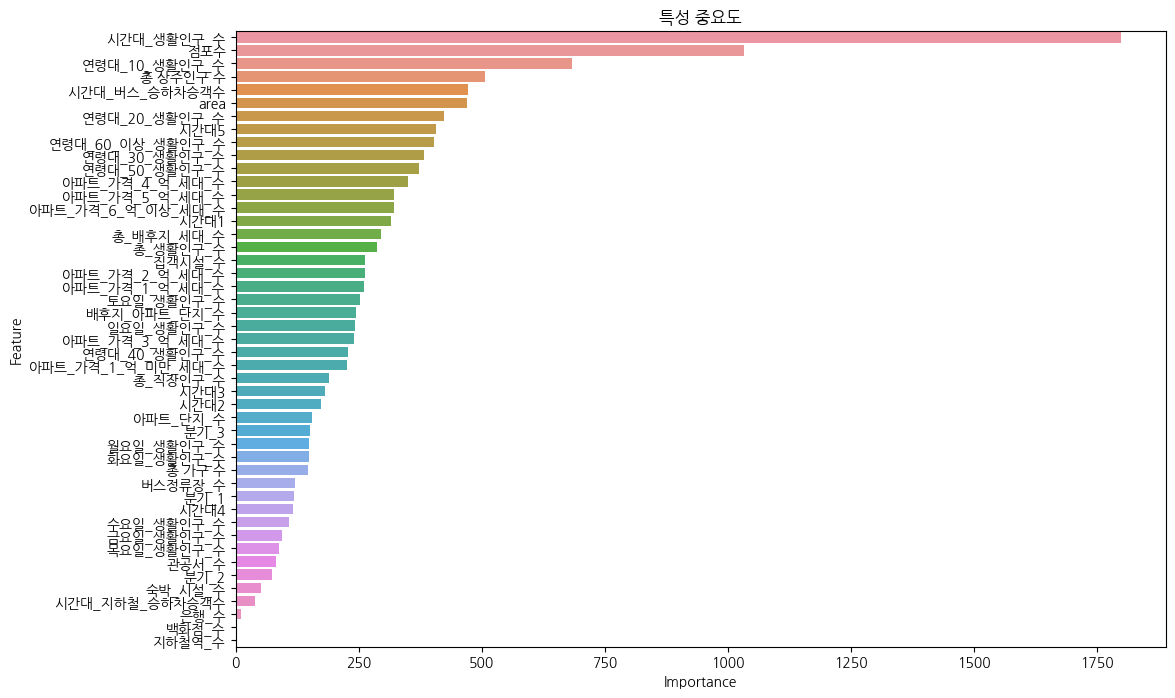

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 2: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 3: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 4: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 5: {'objective': 'regression', 'num_leaves': 37, 'n_estimators': 215, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 43}


In [57]:
# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수','시간대_생활인구_수', 
        '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수',
       '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '배후지_아파트_단지_수',
        '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수', '지하철역_수', '총_배후지_세대_수']

X = data7[features]
y = data7['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')